# Baseball Case Study 

###  Problem Statement:</b>
<em><b>This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.</b>

- <b>Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors </b>

- <b> Output: Number of predicted wins (W) </b></em>

<b><em> To understand the columns meaning, follow the link given below to understand the baseball statistics:</em></b>https://en.wikipedia.org/wiki/Baseball_statistics

# DataSet Link

Downlaod Files: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
df.to_csv('D:\Baseball.csv')

In [4]:
df.shape

(30, 17)

In [5]:
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

- ####  Comment -
    - This dataset contains 16 features which contains statistics summary of the Baseball players and the 'W' (wins) is the target variable which predicts the number of wins.
    - Input features in this dataset are : Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
    - Target features : Number of predicted wins (W)

In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<b><em>The column names present in our data that is not making much sense and will need deciphering to be converted into understandable format. In order to gain understanding of different columns in dataset, following baseball stastics terminology I get from Wikipedia.</em><b>
  
 
- #### Pitching statistics:
    - W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work
    - RA – Run average: number of runs allowed times nine divided by innings pitched
    - ER – Earned run: number of runs that did not occur as a result of errors or passed balls
    - ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
    - CG – Complete game: number of games where player was the only pitcher for their team
    - SHO – Shutout: number of complete games pitched with no runs allowed. A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score. By definition, any pitcher who throws a shutout is also awarded a win. 
    - SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

    
- #### Batting statistics:

    - R – Runs scored: number of times a player crosses home plate
    - AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.  The number of times in which the hitter appeared at the plate and made a base hit, reached base on an error, or was out. 
    - H – Hit: reaching base because of a batted, fair ball without error by the defense
    - 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
    - 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    - HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
    - BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base. 
    - K – Strike out (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base. It usually means the batter is out.

    
- #### Base running statistics:

    - SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense.A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.
    - R – Runs scored: times reached home plate legally and safely

- #### Fielding statistics:

    - E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result. An error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. 

<b><em>Now that we have clearer understanding on what the abbreviation mean and In order to simplify we are going to rename columns in dataset.</em></b>

In [7]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

Wins  Runs Scored  At Bat  Hits  Doubles  Triples  Home Runs  \
0    95          724    5575  1497      300       42        139   
1    83          696    5467  1349      277       44        156   
2    81          669    5439  1395      303       29        141   
3    76          622    5533  1381      260       27        136   
4    74          689    5605  1515      289       49        151   

   Base on Balls  Strike Outs  Stolen Base  Runs Average  Earned Runs  \
0            383          973          104           641          601   
1            439         1264           70           700          653   
2            533         1157           86           640          584   
3            404         1231           68           701          643   
4            455         1259           83           803          746   

   Earned Run Average  Complete Game  Shut Outs  Saves  Errors  
0                3.73              2          8     56      88  
1                4.07              2         12     45      86  
2                3.67             11         10     38      79  
3                3.98              7          9     37     101  
4                4.64              7         12     35      86

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

- ####  Comment -
    - We can obsereve that this datset has only numeric data and no column has categorical data. 
    - This dataset fall into regression analysis.

In [12]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

- #### Comment -
    There is no null value present in dataset.

In [13]:
df.dtypes

Wins                    int64
Runs Scored             int64
At Bat                  int64
Hits                    int64
Doubles                 int64
Triples                 int64
Home Runs               int64
Base on Balls           int64
Strike Outs             int64
Stolen Base             int64
Runs Average            int64
Earned Runs             int64
Earned Run Average    float64
Complete Game           int64
Shut Outs               int64
Saves                   int64
Errors                  int64
dtype: object

# Statistical Analysis

<Axes: >

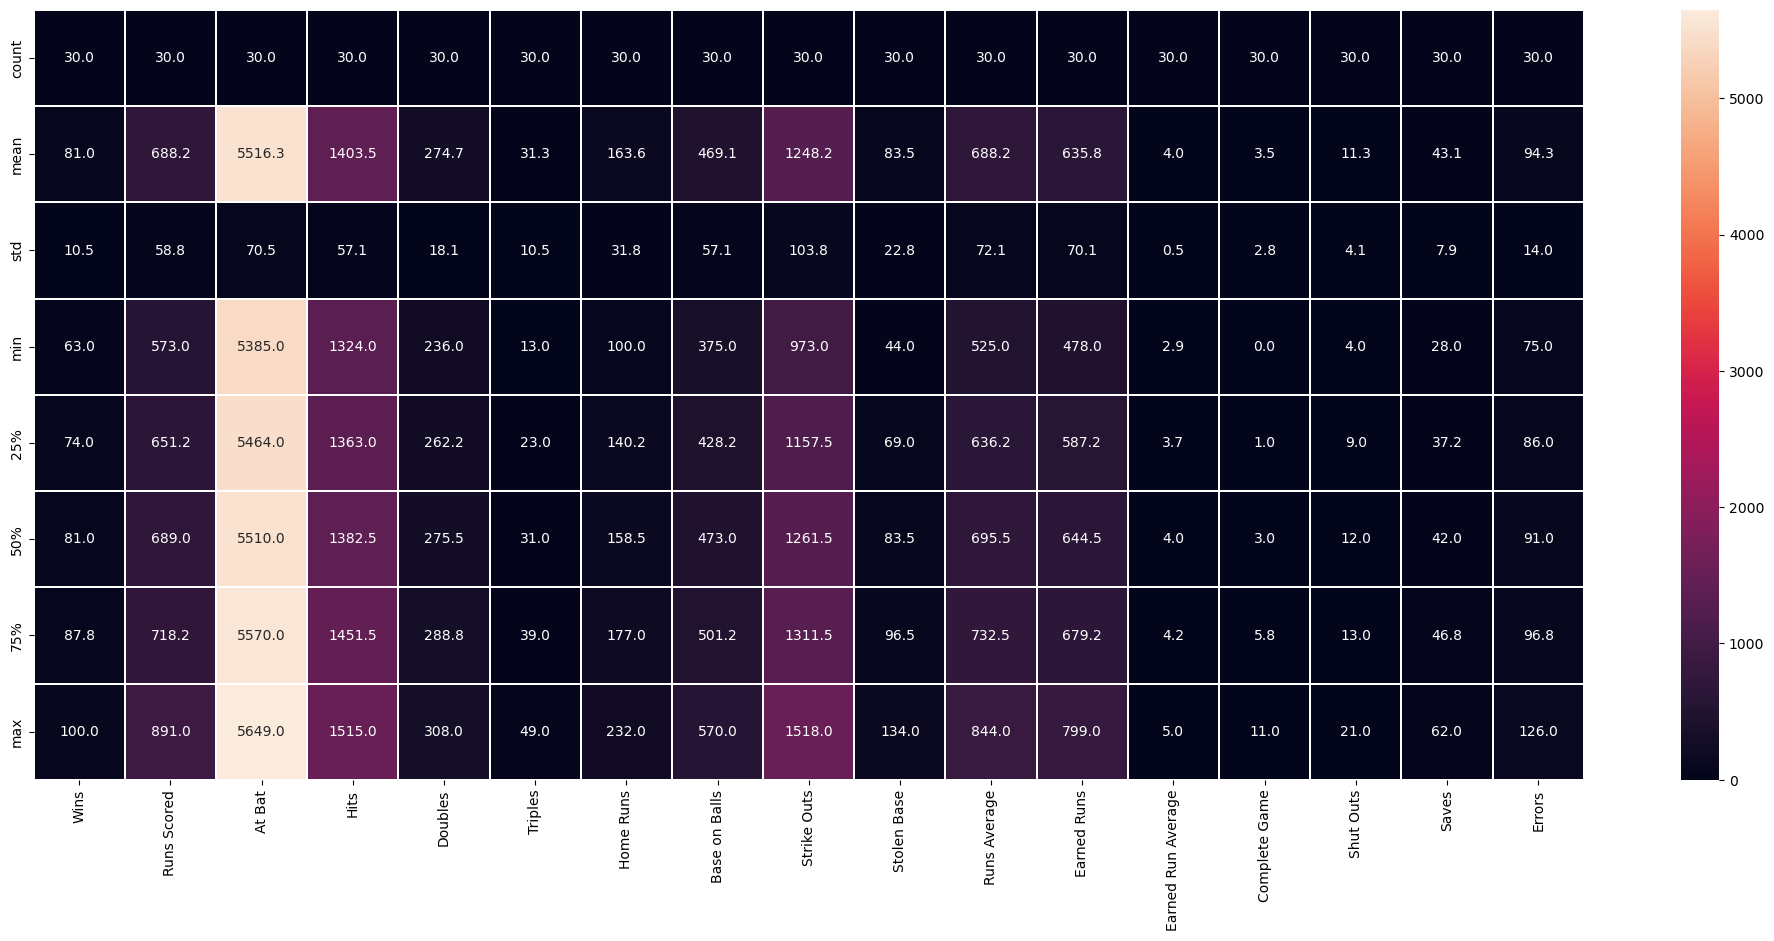

In [14]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(25,10))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

<Axes: >

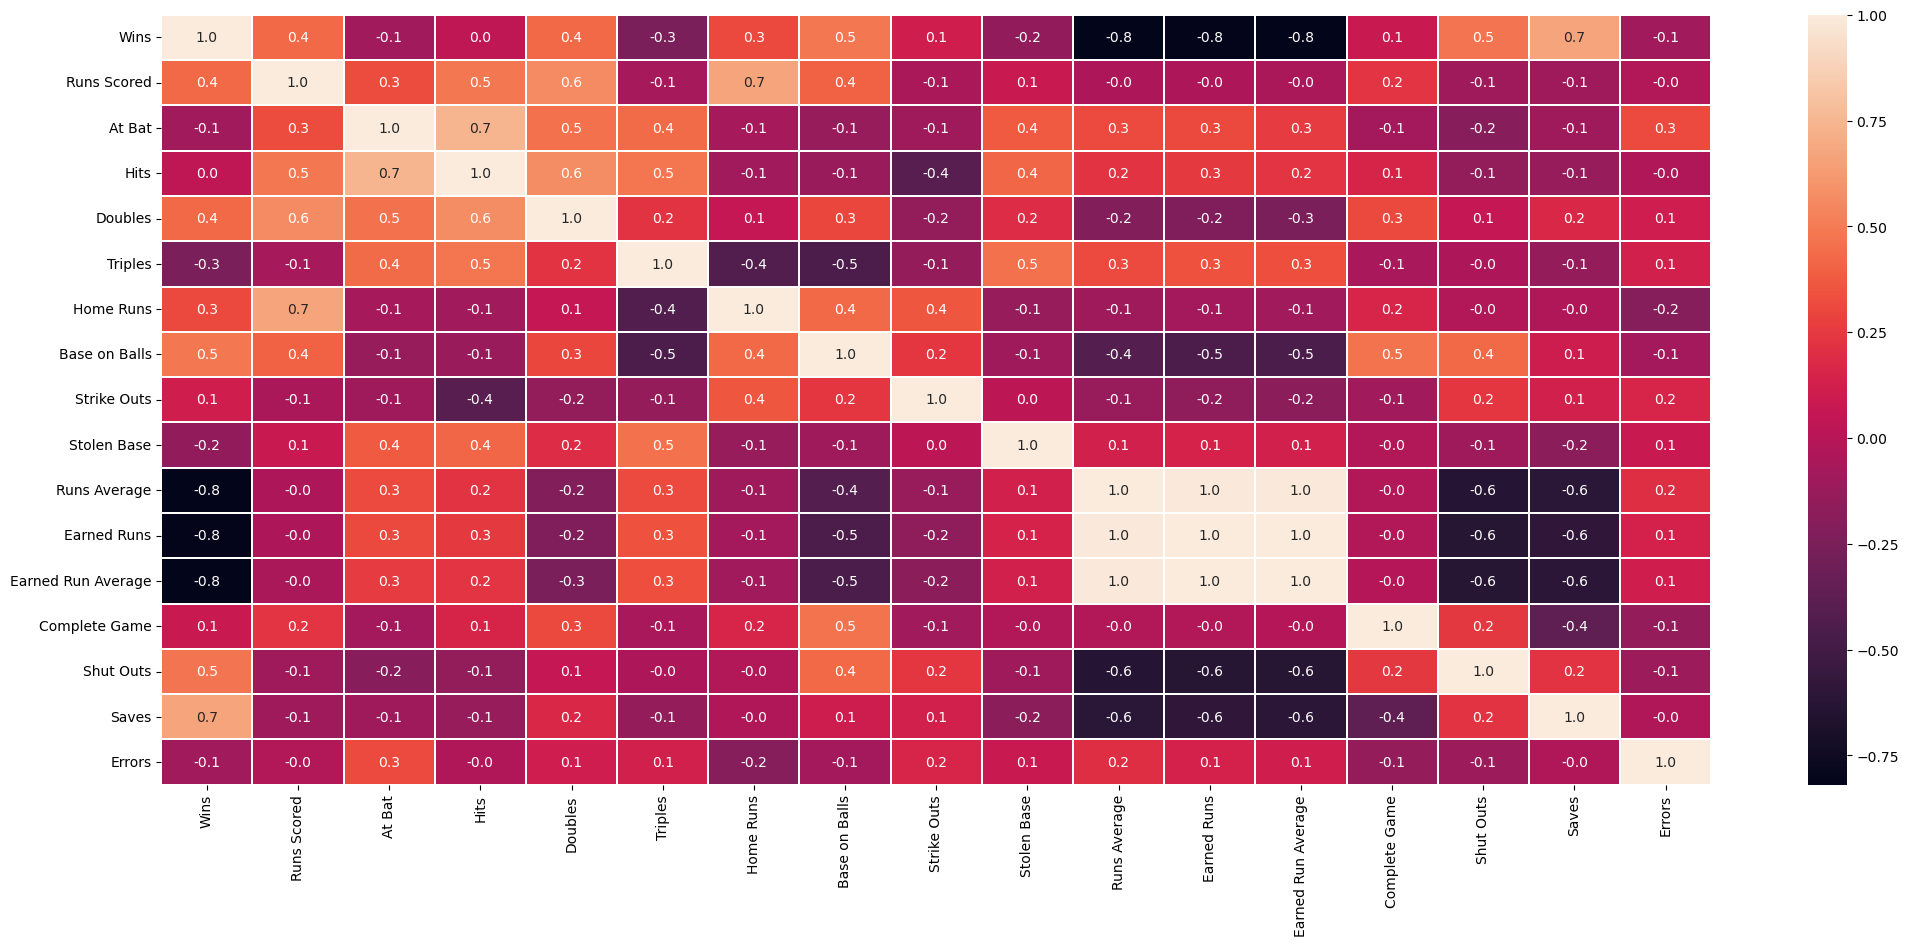

In [15]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),linewidths = 0.1,fmt='0.1f',annot = True)

In [16]:
df.corr()

Wins  Runs Scored    At Bat      Hits   Doubles  \
Wins                1.000000     0.430751 -0.087947  0.037612  0.427797   
Runs Scored         0.430751     1.000000  0.319464  0.482856  0.560084   
At Bat             -0.087947     0.319464  1.000000  0.739122  0.453370   
Hits                0.037612     0.482856  0.739122  1.000000  0.566847   
Doubles             0.427797     0.560084  0.453370  0.566847  1.000000   
Triples            -0.251118    -0.070072  0.435422  0.478694  0.220490   
Home Runs           0.307407     0.671283 -0.066983 -0.090855  0.056292   
Base on Balls       0.484342     0.402452 -0.136414 -0.118281  0.302700   
Strike Outs         0.111850    -0.054726 -0.106022 -0.398830 -0.150752   
Stolen Base        -0.157234     0.081367  0.372618  0.413444  0.195027   
Runs Average       -0.812952    -0.041623  0.316010  0.224324 -0.218160   
Earned Runs        -0.809435    -0.041245  0.309686  0.252489 -0.235531   
Earned Run Average -0.819600    -0.049281  0.255551  0.231172 -0.254854   
Complete Game       0.080533     0.232042 -0.080876  0.147955  0.306675   
Shut Outs           0.471805    -0.103274 -0.197321 -0.145559  0.057998   
Saves               0.666530    -0.096380 -0.106367 -0.130371  0.171576   
Errors             -0.089485    -0.023262  0.316743 -0.033173  0.105754   

                     Triples  Home Runs  Base on Balls  Strike Outs  \
Wins               -0.251118   0.307407       0.484342     0.111850   
Runs Scored        -0.070072   0.671283       0.402452    -0.054726   
At Bat              0.435422  -0.066983      -0.136414    -0.106022   
Hits                0.478694  -0.090855      -0.118281    -0.398830   
Doubles             0.220490   0.056292       0.302700    -0.150752   
Triples             1.000000  -0.430915      -0.454949    -0.141196   
Home Runs          -0.430915   1.000000       0.425691     0.359923   
Base on Balls      -0.454949   0.425691       1.000000     0.233652   
Strike Outs        -0.141196   0.359923       0.233652     1.000000   
Stolen Base         0.457437  -0.136567      -0.098347     0.030968   
Runs Average        0.314125  -0.103903      -0.416445    -0.129745   
Earned Runs         0.340225  -0.085922      -0.452663    -0.161612   
Earned Run Average  0.330951  -0.090917      -0.459832    -0.180368   
Complete Game      -0.065898   0.156502       0.462478    -0.093418   
Shut Outs          -0.041396  -0.019119       0.426004     0.237721   
Saves              -0.142370  -0.028540       0.099445     0.126297   
Errors              0.126678  -0.207597      -0.075685     0.155133   

                    Stolen Base  Runs Average  Earned Runs  \
Wins                  -0.157234     -0.812952    -0.809435   
Runs Scored            0.081367     -0.041623    -0.041245   
At Bat                 0.372618      0.316010     0.309686   
Hits                   0.413444      0.224324     0.252489   
Doubles                0.195027     -0.218160    -0.235531   
Triples                0.457437      0.314125     0.340225   
Home Runs             -0.136567     -0.103903    -0.085922   
Base on Balls         -0.098347     -0.416445    -0.452663   
Strike Outs            0.030968     -0.129745    -0.161612   
Stolen Base            1.000000      0.132290     0.143068   
Runs Average           0.132290      1.000000     0.991018   
Earned Runs            0.143068      0.991018     1.000000   
Earned Run Average     0.126063      0.986674     0.997248   
Complete Game         -0.020783     -0.016659    -0.020221   
Shut Outs             -0.106563     -0.636862    -0.630192   
Saves                 -0.183418     -0.616224    -0.589663   
Errors                 0.079149      0.198996     0.136921   

                    Earned Run Average  Complete Game  Shut Outs     Saves  \
Wins                         -0.819600       0.080533   0.471805  0.666530   
Runs Scored                  -0.049281       0.232042  -0.103274 -0.096380   
At Bat                        0.255551     

In [18]:
df.describe().T

count         mean         std      min        25%  \
Wins                 30.0    80.966667   10.453455    63.00    74.0000   
Runs Scored          30.0   688.233333   58.761754   573.00   651.2500   
At Bat               30.0  5516.266667   70.467372  5385.00  5464.0000   
Hits                 30.0  1403.533333   57.140923  1324.00  1363.0000   
Doubles              30.0   274.733333   18.095405   236.00   262.2500   
Triples              30.0    31.300000   10.452355    13.00    23.0000   
Home Runs            30.0   163.633333   31.823309   100.00   140.2500   
Base on Balls        30.0   469.100000   57.053725   375.00   428.2500   
Strike Outs          30.0  1248.200000  103.759470   973.00  1157.5000   
Stolen Base          30.0    83.500000   22.815225    44.00    69.0000   
Runs Average         30.0   688.233333   72.108005   525.00   636.2500   
Earned Runs          30.0   635.833333   70.140786   478.00   587.2500   
Earned Run Average   30.0     3.956333    0.454089     2.94     3.6825   
Complete Game        30.0     3.466667    2.763473     0.00     1.0000   
Shut Outs            30.0    11.300000    4.120177     4.00     9.0000   
Saves                30.0    43.066667    7.869335    28.00    37.2500   
Errors               30.0    94.333333   13.958889    75.00    86.0000   

                         50%      75%      max  
Wins                  81.000    87.75   100.00  
Runs Scored          689.000   718.25   891.00  
At Bat              5510.000  5570.00  5649.00  
Hits                1382.500  1451.50  1515.00  
Doubles              275.500   288.75   308.00  
Triples               31.000    39.00    49.00  
Home Runs            158.500   177.00   232.00  
Base on Balls        473.000   501.25   570.00  
Strike Outs         1261.500  1311.50  1518.00  
Stolen Base           83.500    96.50   134.00  
Runs Average         695.500   732.50   844.00  
Earned Runs          644.500   679.25   799.00  
Earned Run Average     4.025     4.22     5.04  
Complete Game          3.000     5.75    11.00  
Shut Outs             12.000    13.00    21.00  
Saves                 42.000    46.75    62.00  
Errors                91.000    96.75   126.00

- #### Comment -
     - If we just look at mean and 50% columns for different feature we can see data is sightly right skew for most of features.
     - Count is same for each variable.
     - 75% and max values for Errors, Shutout, Run Scored shows presence of possible outliers.
     - Overall all statstical parameter from mean to max, indicate <b> features are seem to be progressing in a definite manner showing no visible abnormalities.</b>
     -  Heatmap clearly shows data need to scale while building ML Model.

<Axes: >

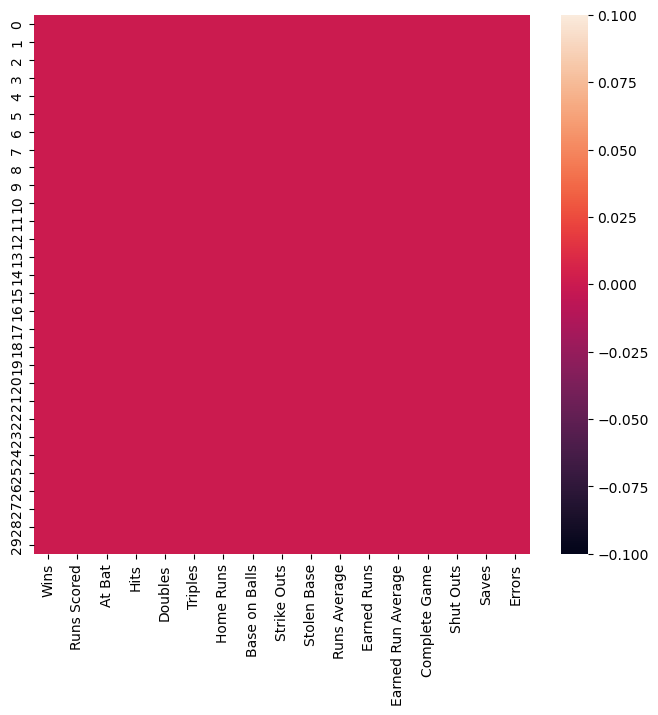

In [19]:
plt.figure(figsize=(8,7))
sns.heatmap(df.isnull())

# EDA

- Here we can try to bring insight in what feature contribute to win

 - <b>Distribution of features<b/>

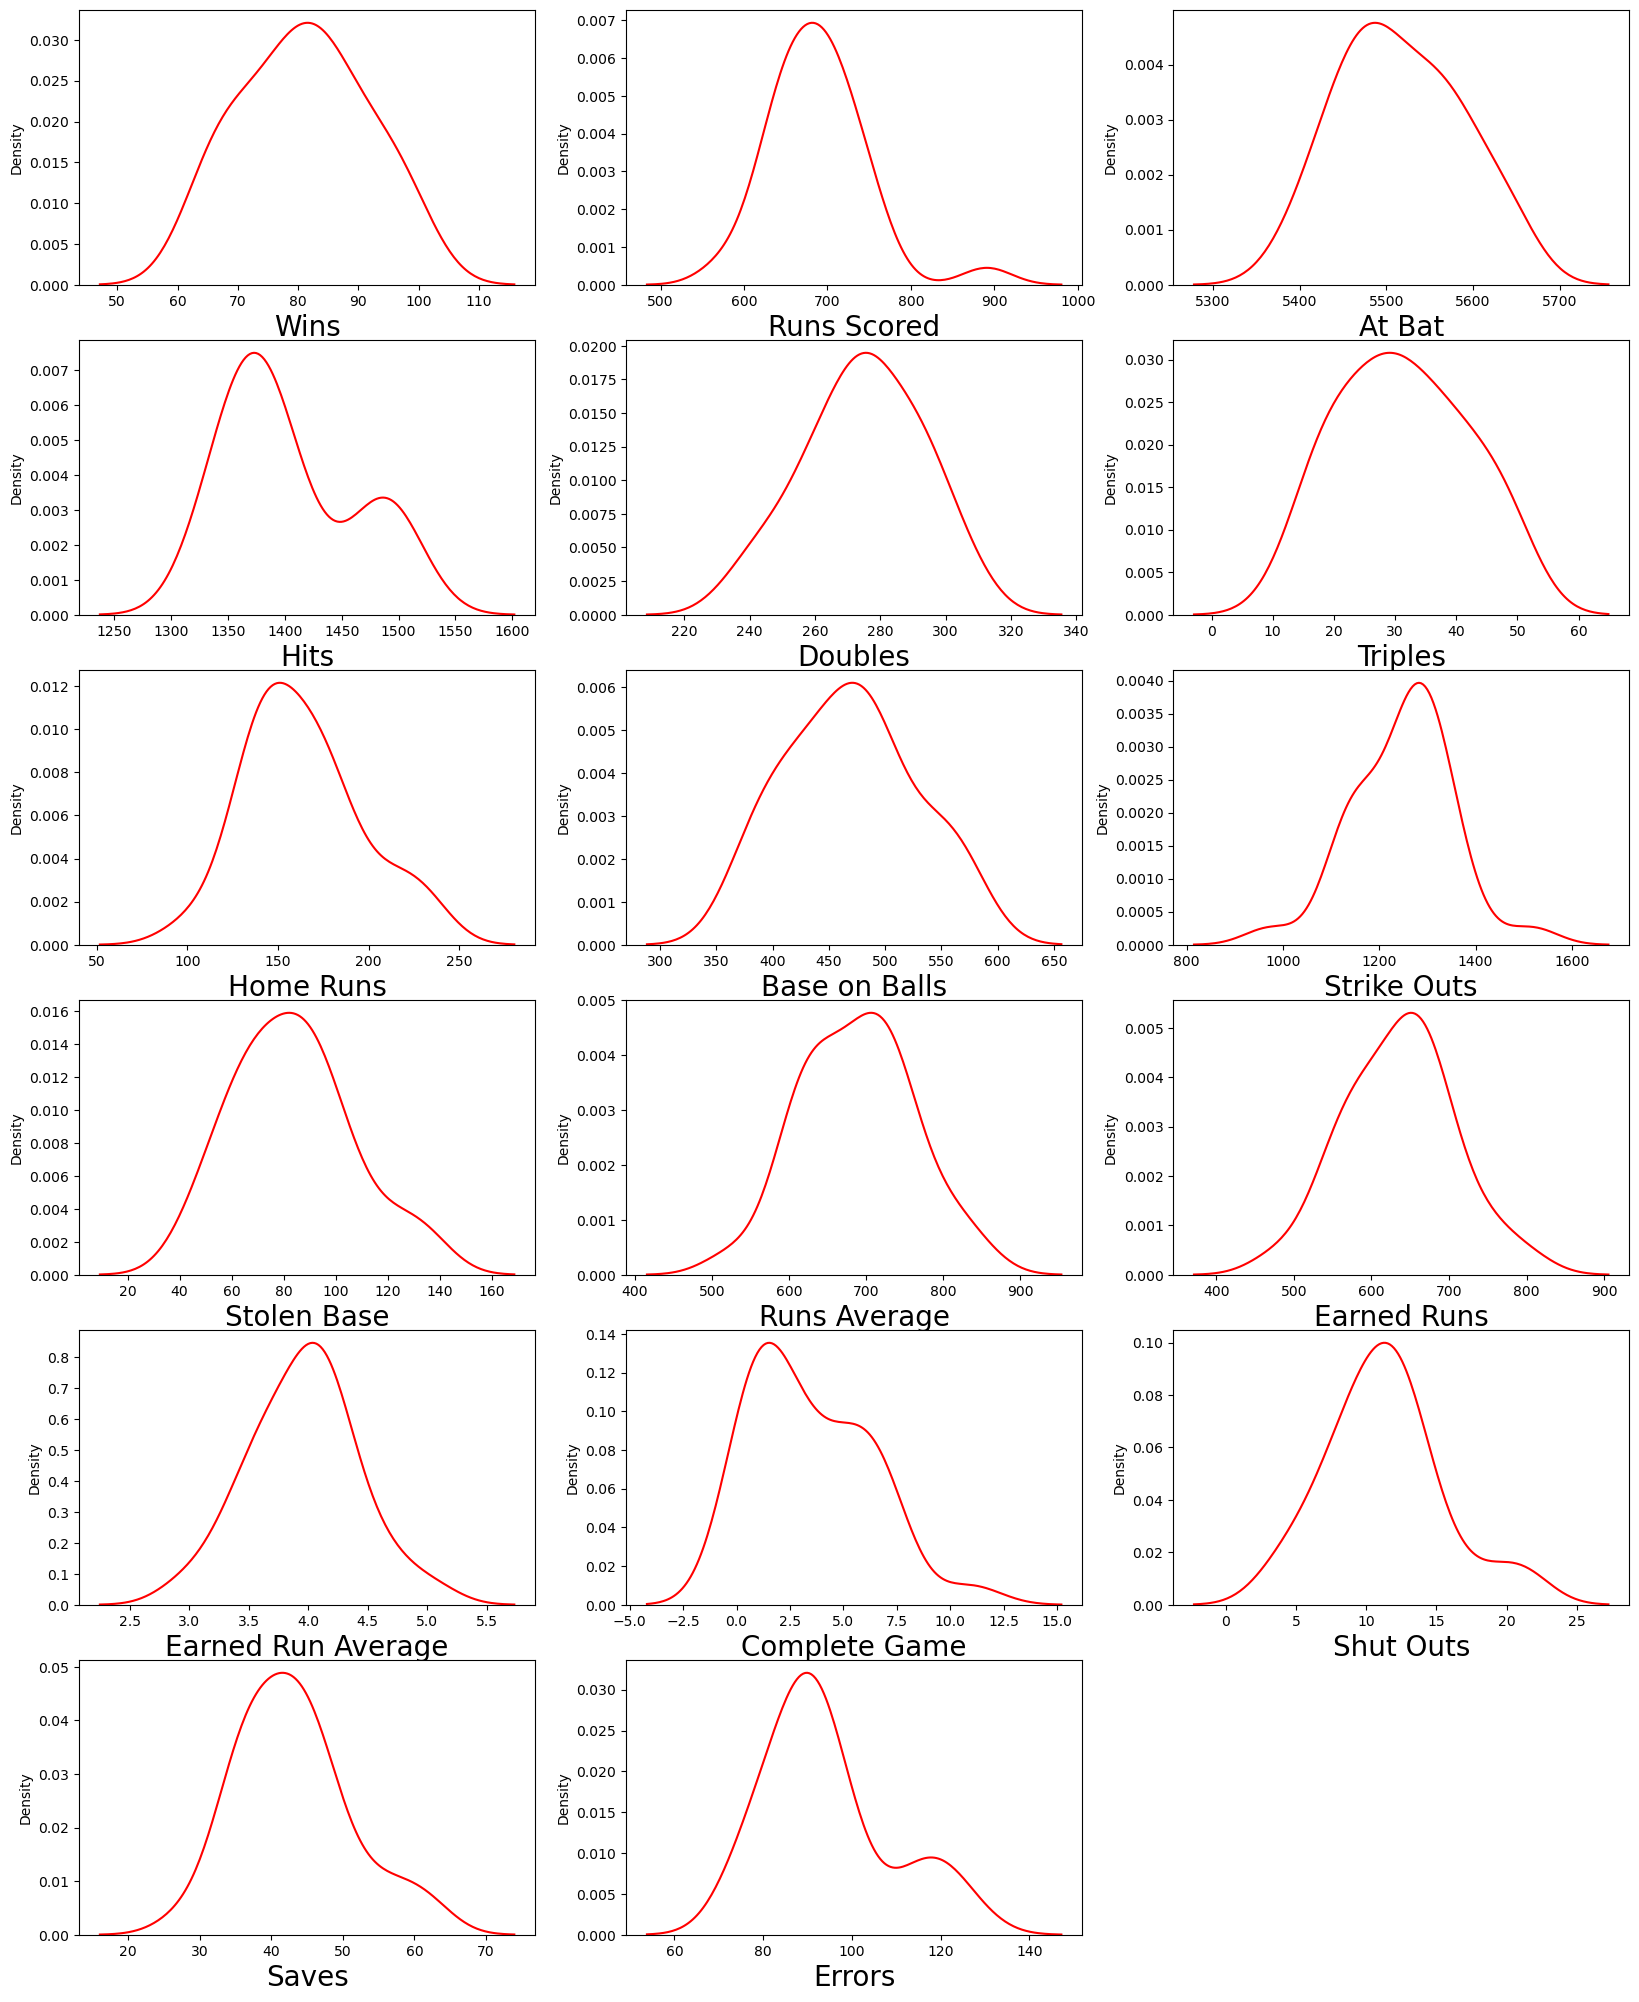

In [22]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Comment -
Clearly some of feature are either left or right skewed.

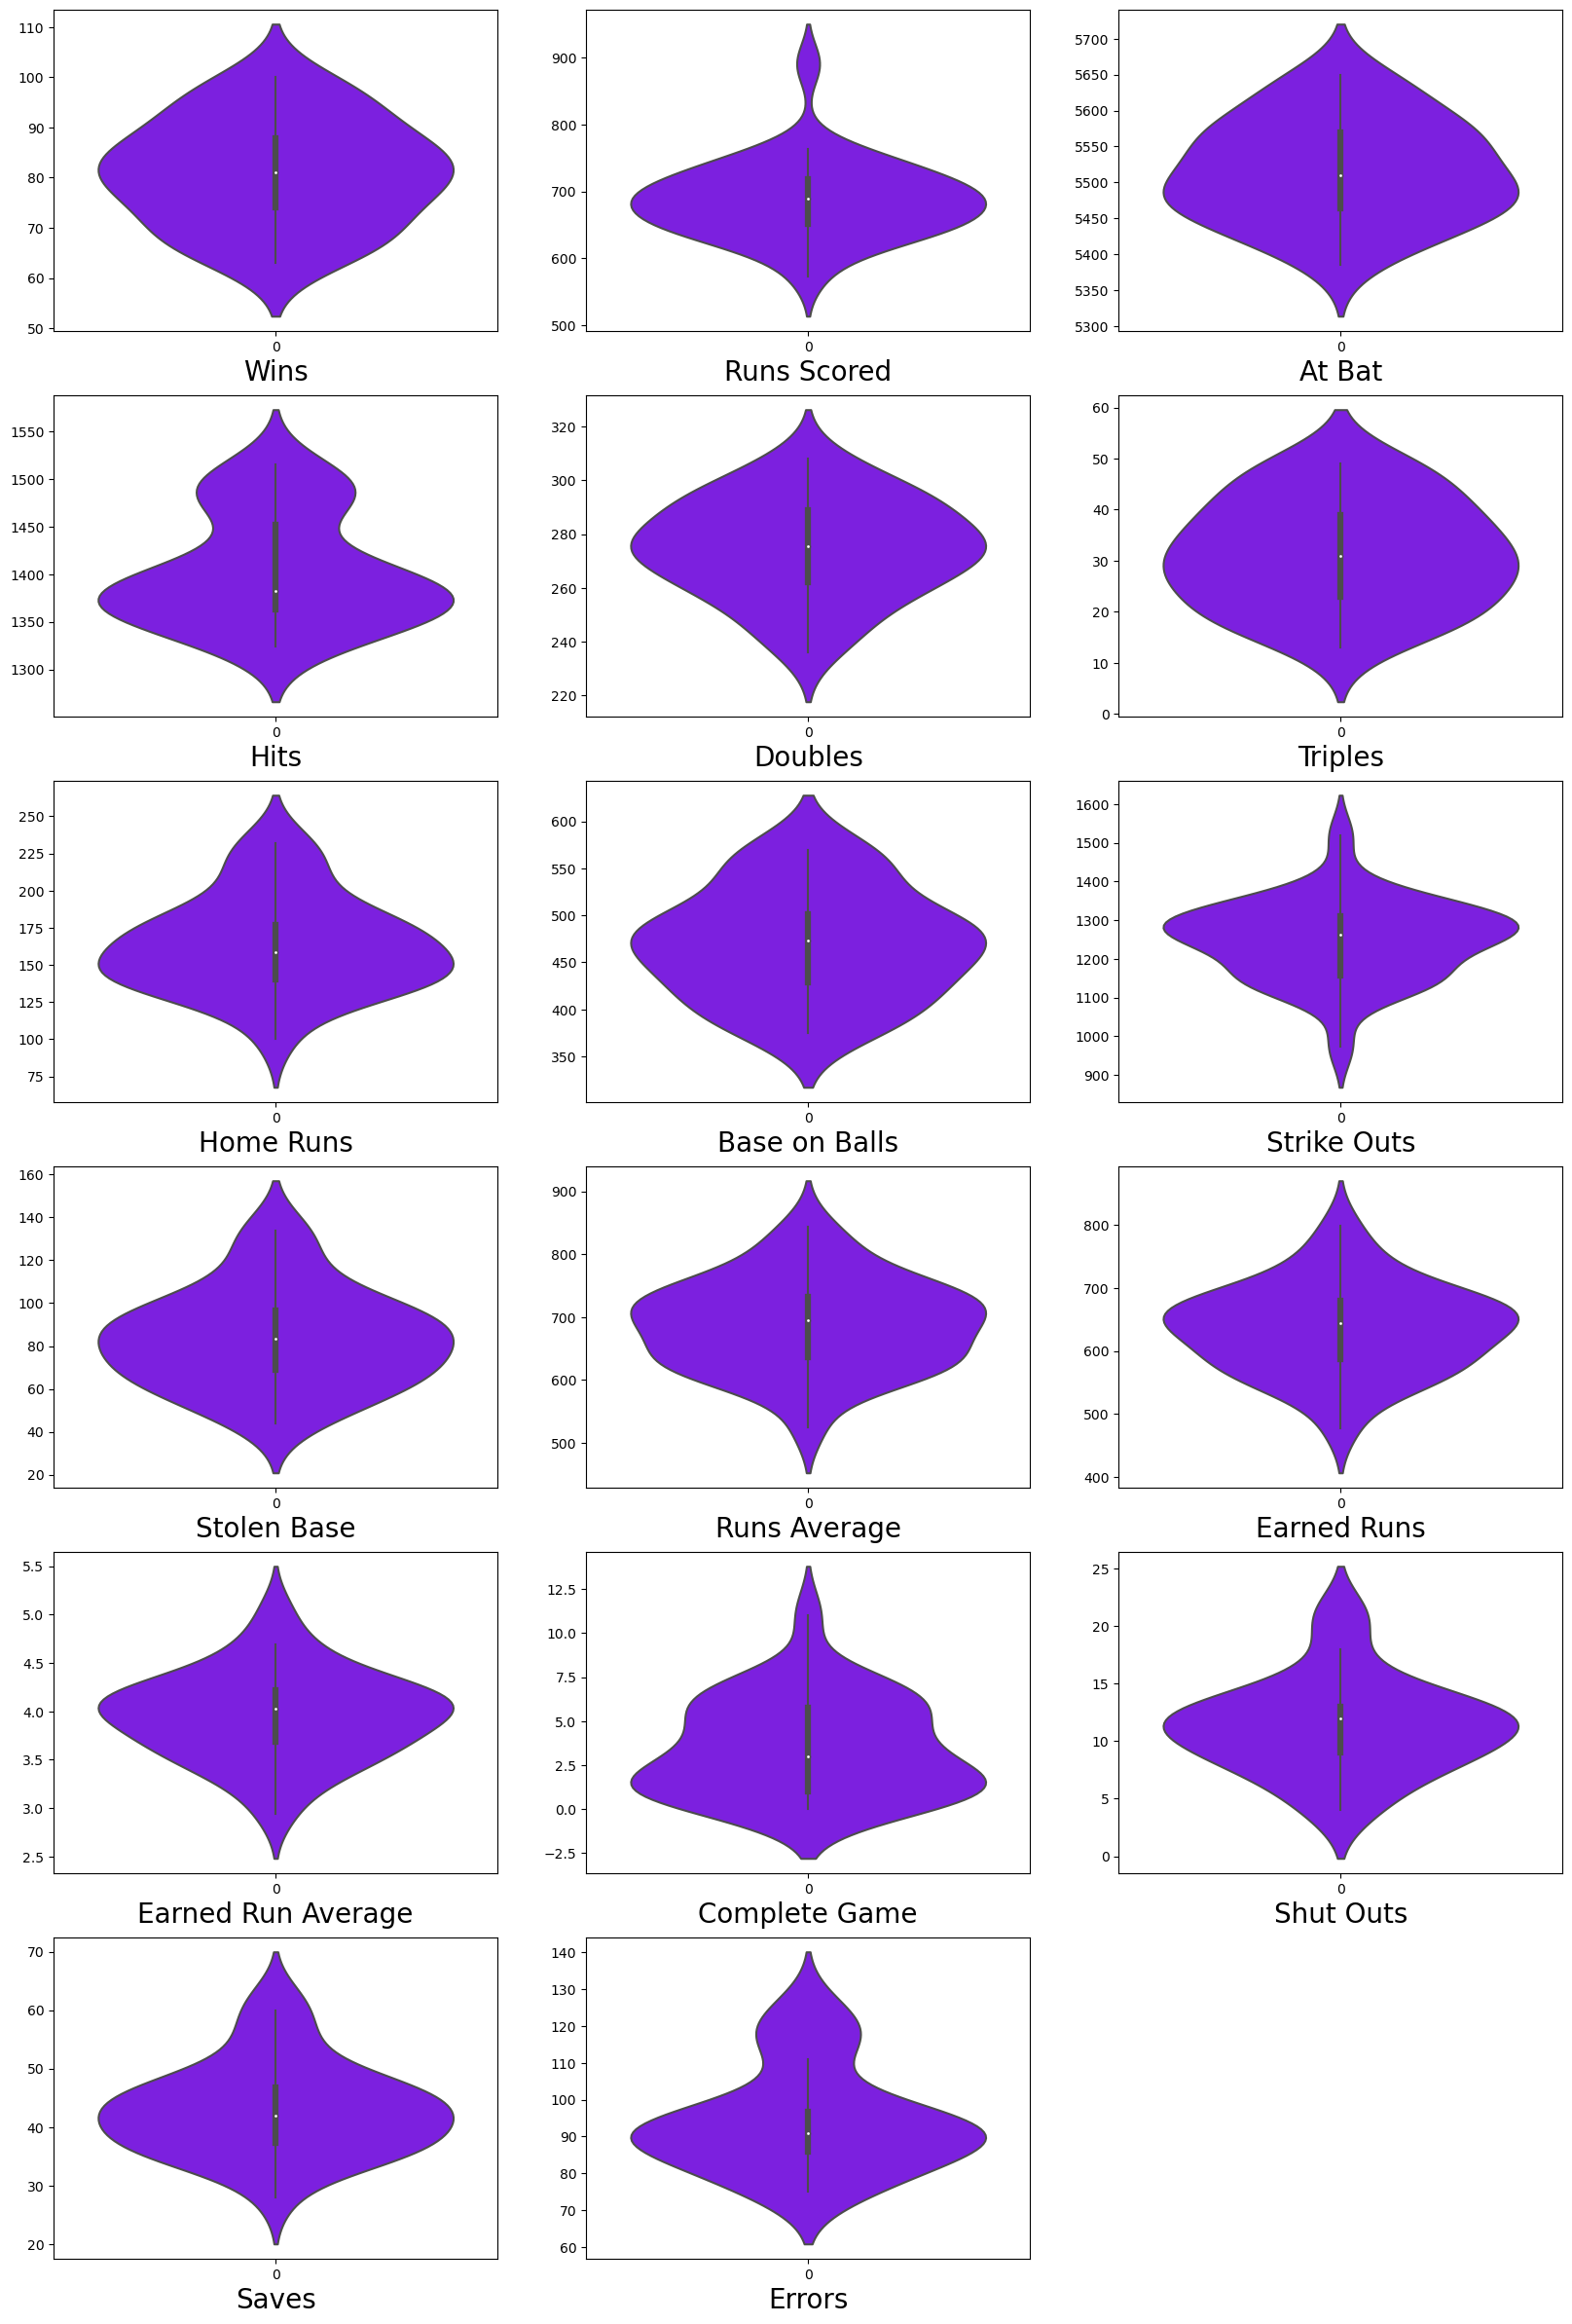

In [23]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b><em> Lets now Investigate Runs and Hits together , before that let dive into how team get win and some clearity over Run Vs Hits </b></em>
- <b> How do u win baseball ? </b>
    - To win in baseball, you must reach the end of the game with more runs than your opponent. If you have the same amount of runs, you will go into another inning until one team has more runs at the end of the inning.
    
- <b> Runs Vs Hits </b>
    - Runs (R) - The number of runs scored by that player, by reaching home base in any manner. 
    - Hits (H) - The number of base hits made by that player, not including reaching base on an error or on a "fielder's choice".
    
<b><em> So Now we will put insight on how many hits convert into Runs and inturn lead to win throgh multivariate analysis </b></em>

Text(0, 0.5, 'Hits')

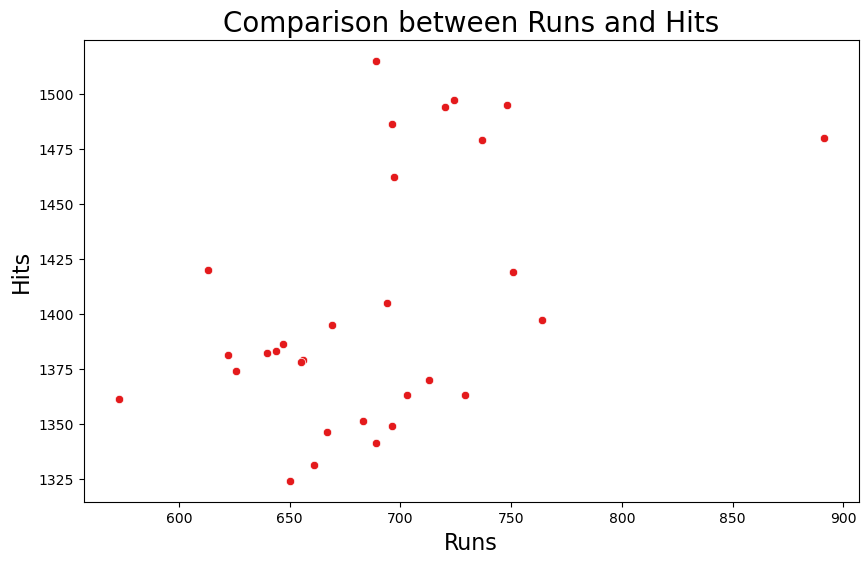

In [53]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Hits',fontsize =20)
sns.scatterplot(x='Runs Scored',y='Hits',data=df)
plt.xlabel('Runs',fontsize =16)
plt.ylabel("Hits",fontsize =16)

- #### Comment :
    - Home Runs in range of <u> 140 & 180 </u> with combination of Run Scored in between <u> 650-750 </u> lead to more than 90 Wins for team. So keeping home runs in this range is cruical for more possibility of wins. 
    - But still its game, anything is possible with good performance of single winning player. We can see from scatter plot some of the datapoints have homeruns above 200, but still in wins are around 80.
    
 <b> In conclusion we can say that Home runs is definitely contributing factor for team to win but not sufficient to make sure win. </b>

# Boxplot of Features

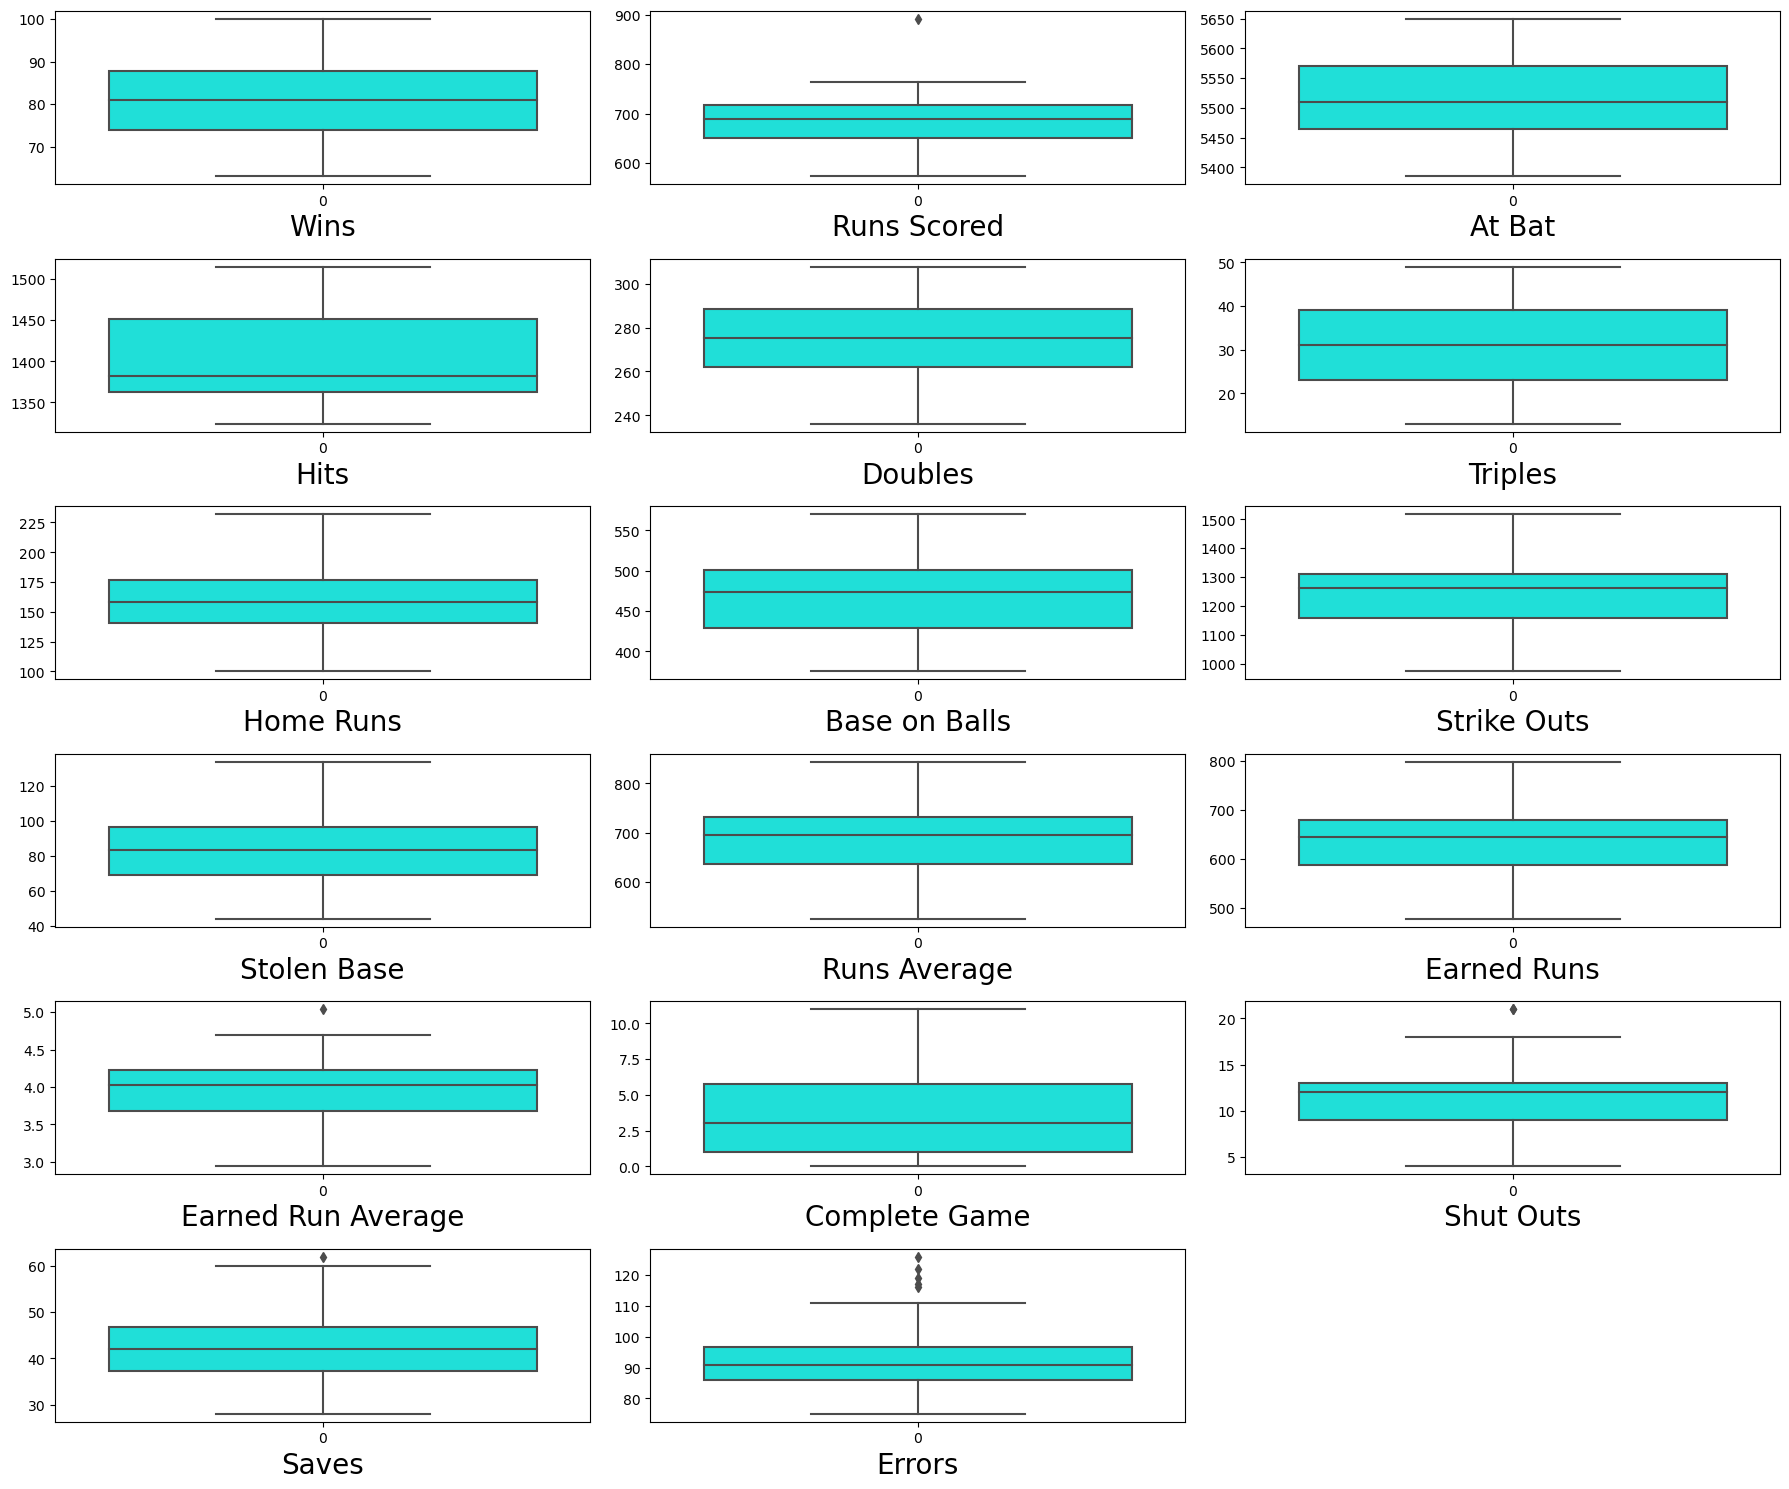

In [34]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- #### Comment :
    - There are some outliers present in data. But as data is of Real world MLB 2014, these outliers are valid datapoints.
    - Shutouts are rare but completely possible with exceptional performance.
    - Run scored has one outliers but as Run is one of the most important parameter, it will be wise to remove corresponding datpoint.
    - Outliers in Errors are totally possible so now need to worry about i

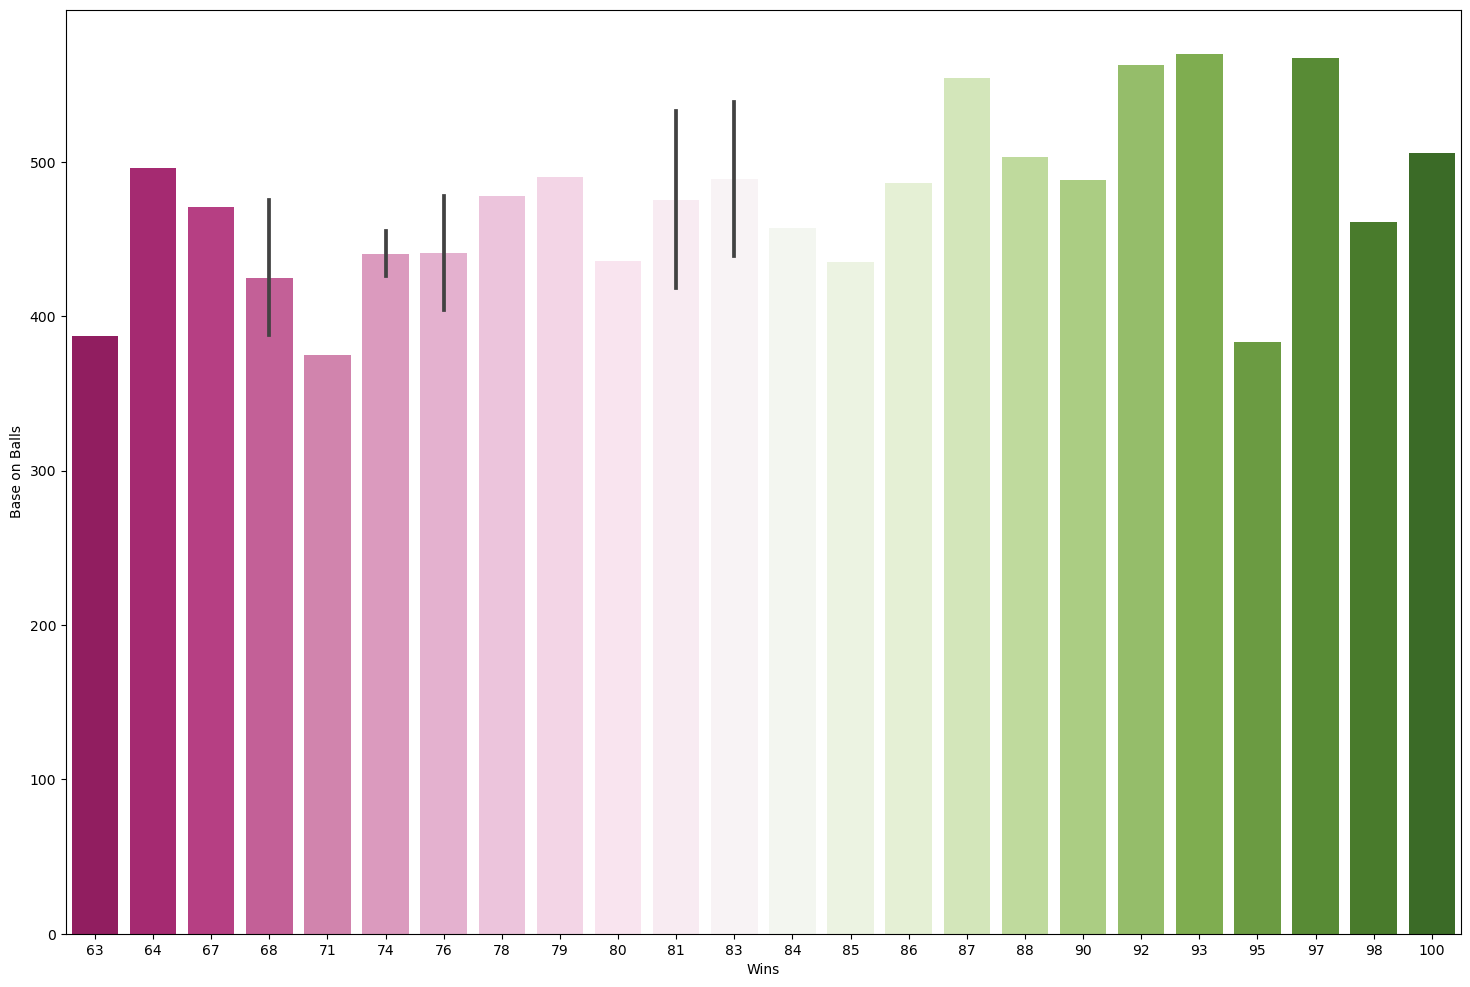

In [35]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Base on Balls", data=df,palette='PiYG')
plt.show()

- #### Comment :
    - Base on ball is contribution from pitcher to batter for winning. In simple word it is like Wide or No Ball in Cricket.
    - We can see that base on ball above 400 really contribute in Wins in team.

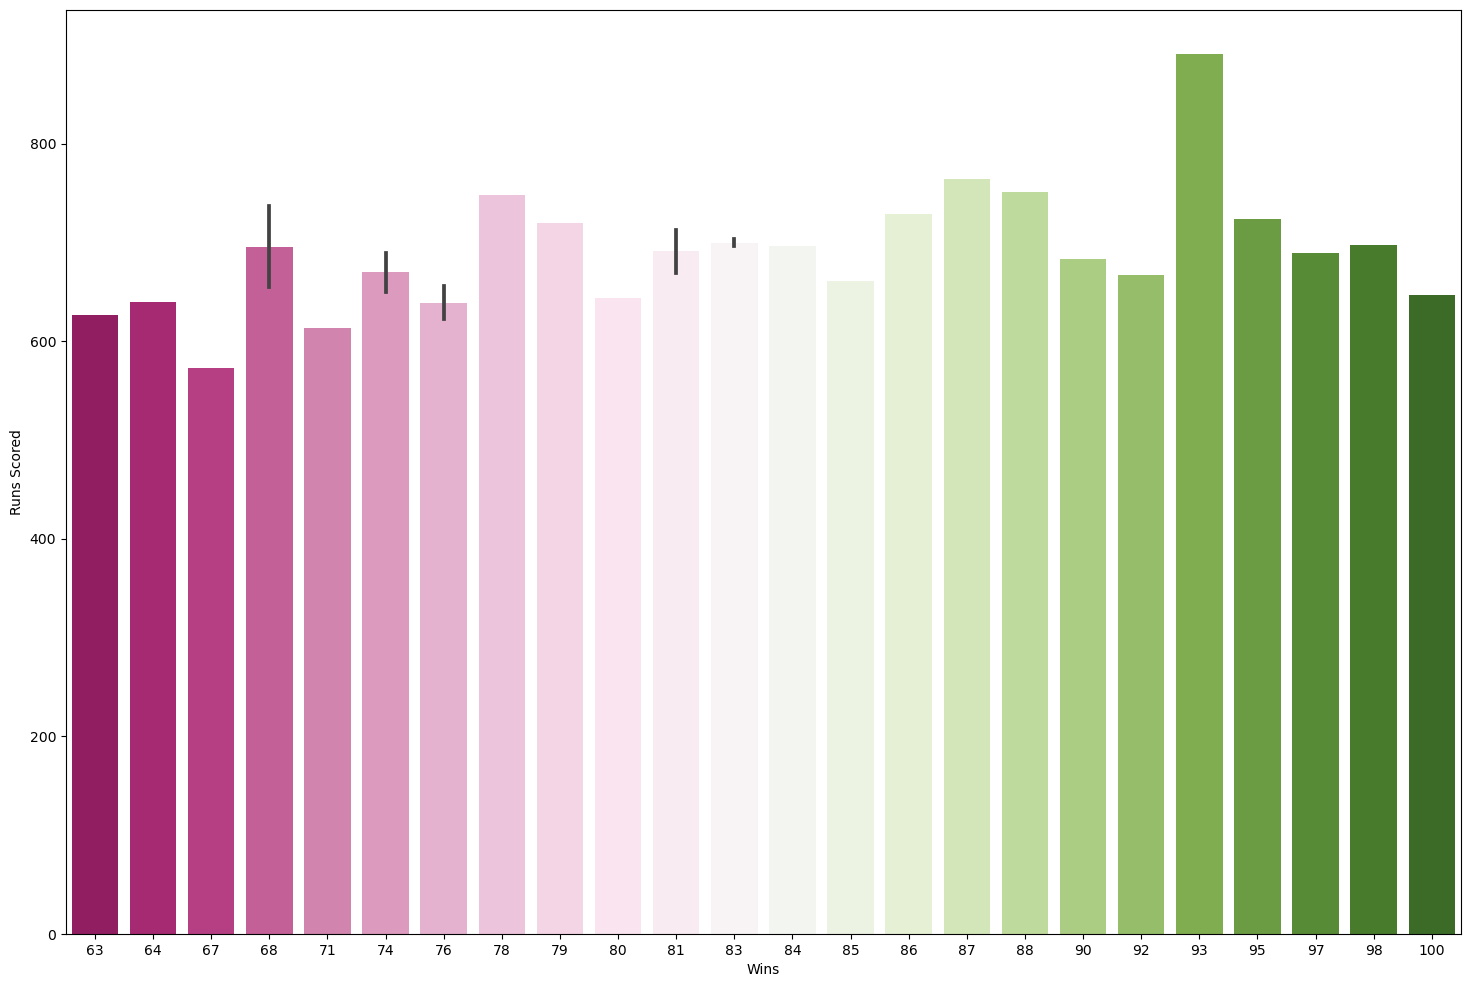

In [36]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Scored", data=df,palette='PiYG')
plt.show()

- #### Comment:
    - Run Scored above 600 is benchmark for wining in any scenerio

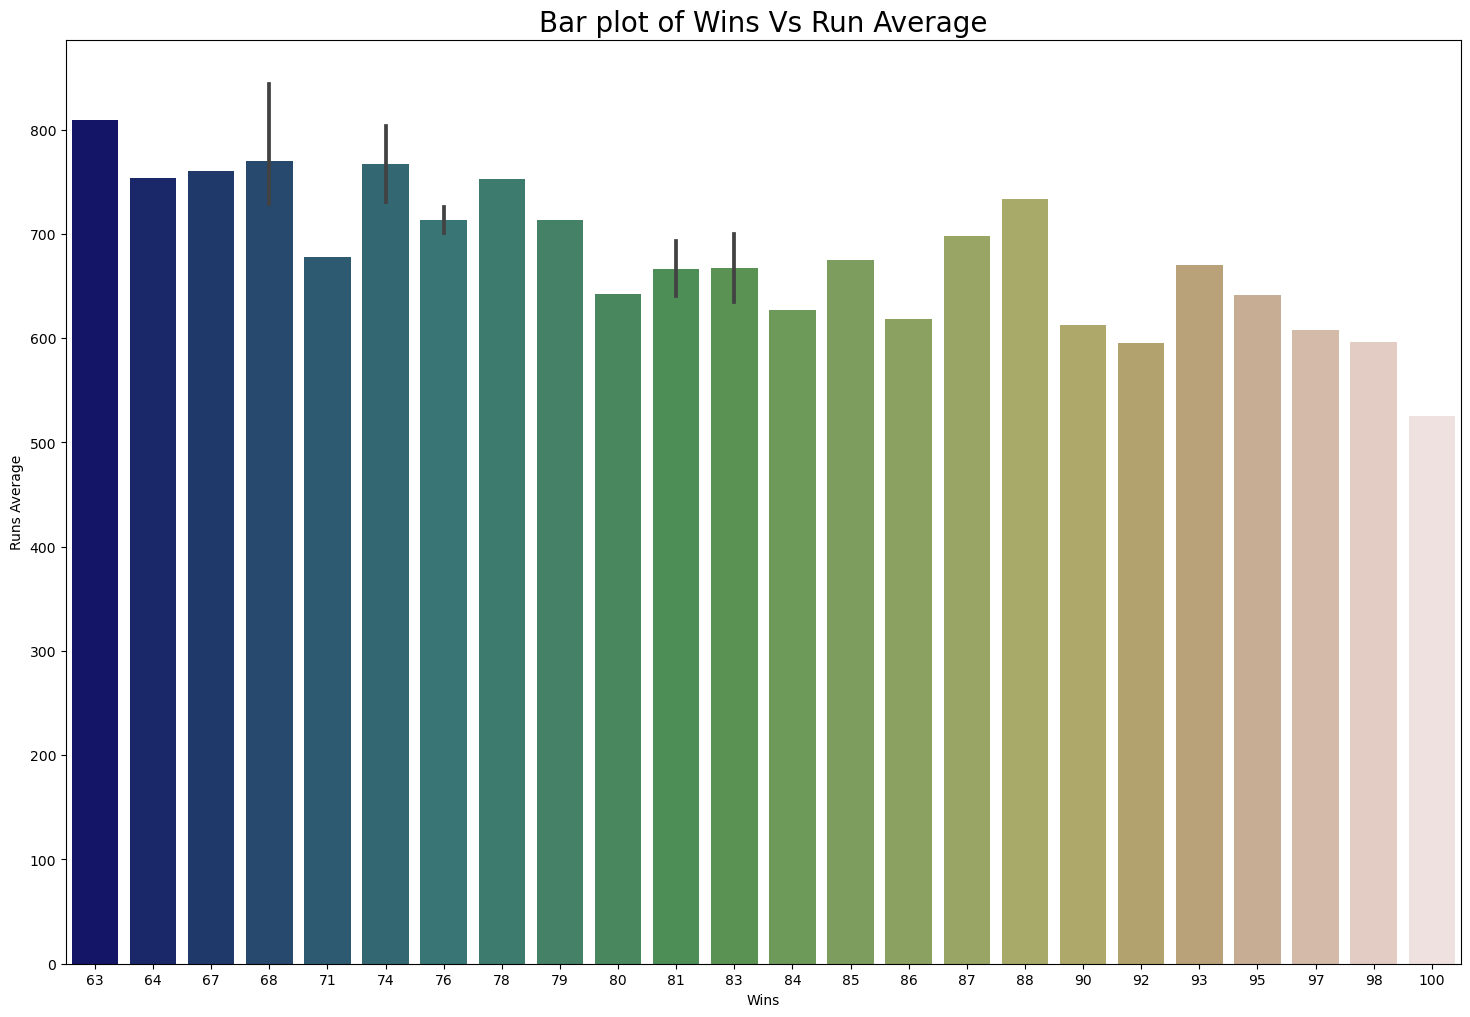

In [48]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Average", data=df,palette='gist_earth')
plt.title('Bar plot of Wins Vs Run Average', fontsize =20)
plt.show()

- #### Comment :
    - Here comes interesting plot, we can see Run Average decrease with increase in number of wins. <b>But why this trend if more runs means directly increase in chance of winning.</b>
    - <u> More Run Average gives advantage to hitter and here as wins are high even at low run this clearly means that perforamance of pitcher is better than hitter i.e. pitcher is knocking out hitter at low run score. This must be reflected in any pitcher side stastical parameter like Strike outs, Earned Run or Earned Run Average.</u>
    
<b><em> Lets try find answer of this millon dollor puzzle by diving more into relation of Wins with parameters like ERA, strikeouts.</b></em>

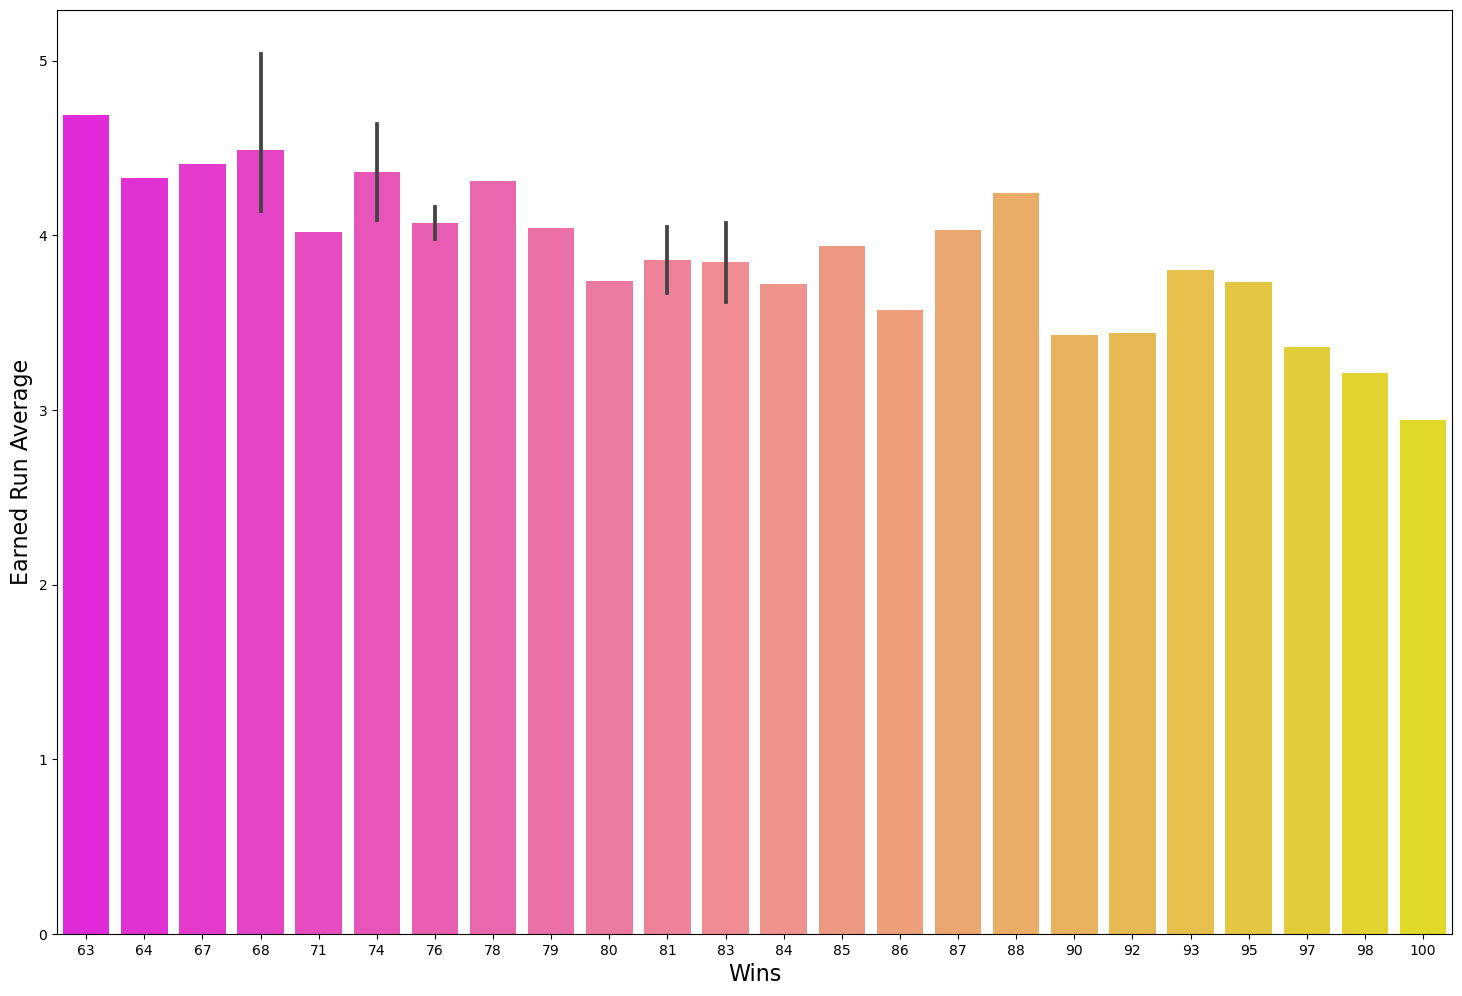

In [54]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Earned Run Average", data=df,palette='spring')
plt.xlabel('Wins',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)
plt.show()

- #### Comment :
    <b><em>And here we got what we looking for.As we thought there must be atleast one pitcher parameter where this decreasing trend must be reflected.</em>
    - ERA is low for maximum wins. Low ERA by pitcher clearly means that pitcher is giving less chance given to batter to score run.
    - We already come to conclusion of keeping ERA less than 3.5 in previous result. This plot also support that story.
    - But this also indicate that <b> ERA and Runs Average score are bound to related with each other in linear relationship</b> (may be positive or negtive).
    - Another things here is <b> that Earned Run and Wins must have negative relationship.</b> we will check it in further investigation.
    
<b> Let check it through strip plot between Runs Average and Earned Run Average </b>

Text(0, 0.5, 'Earned Run Average')

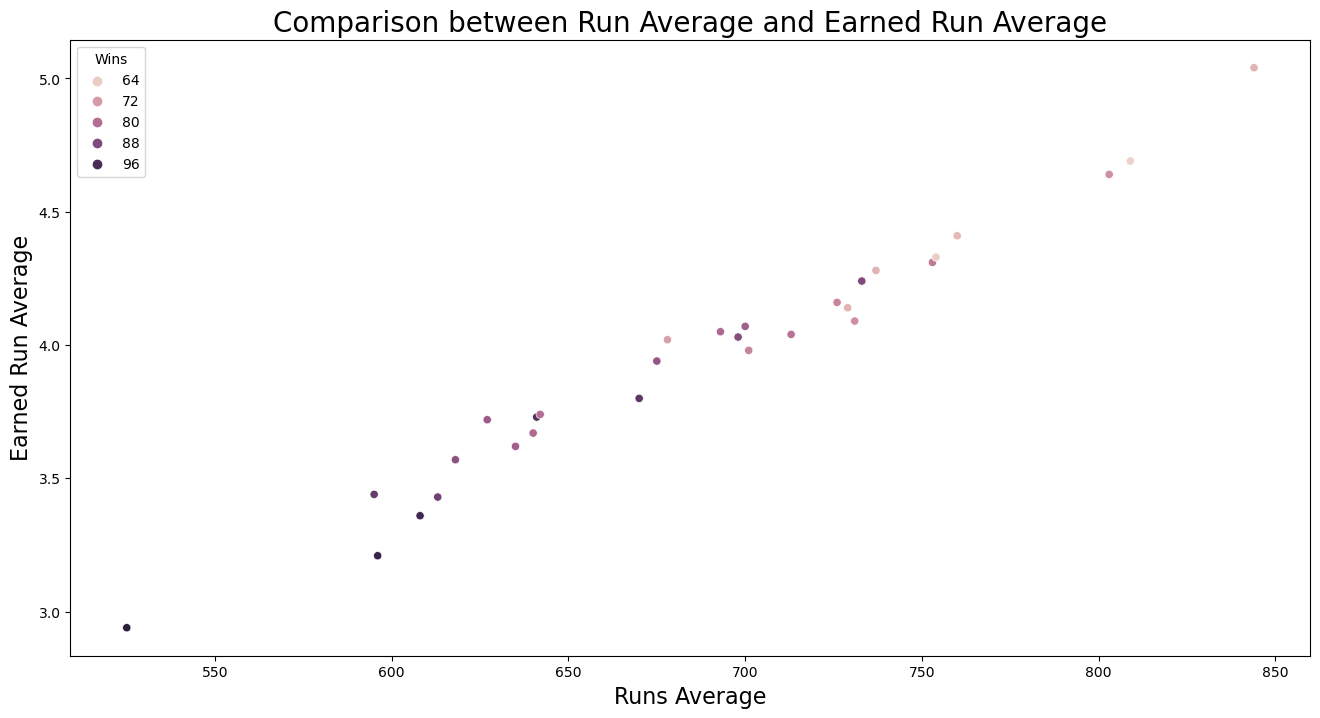

In [63]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.scatterplot(x=df['Runs Average'],y=df['Earned Run Average'],hue=df['Wins'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Earned Run Average",fontsize =16)

- #### Comment :
    Here we got what we suspect in previous plot. ERA and RA hold linear relationship.
    
<b> Now let check strikeout show same behavior as ERA with respect to Runs Average.</b>

Text(0, 0.5, 'Strike Outs')

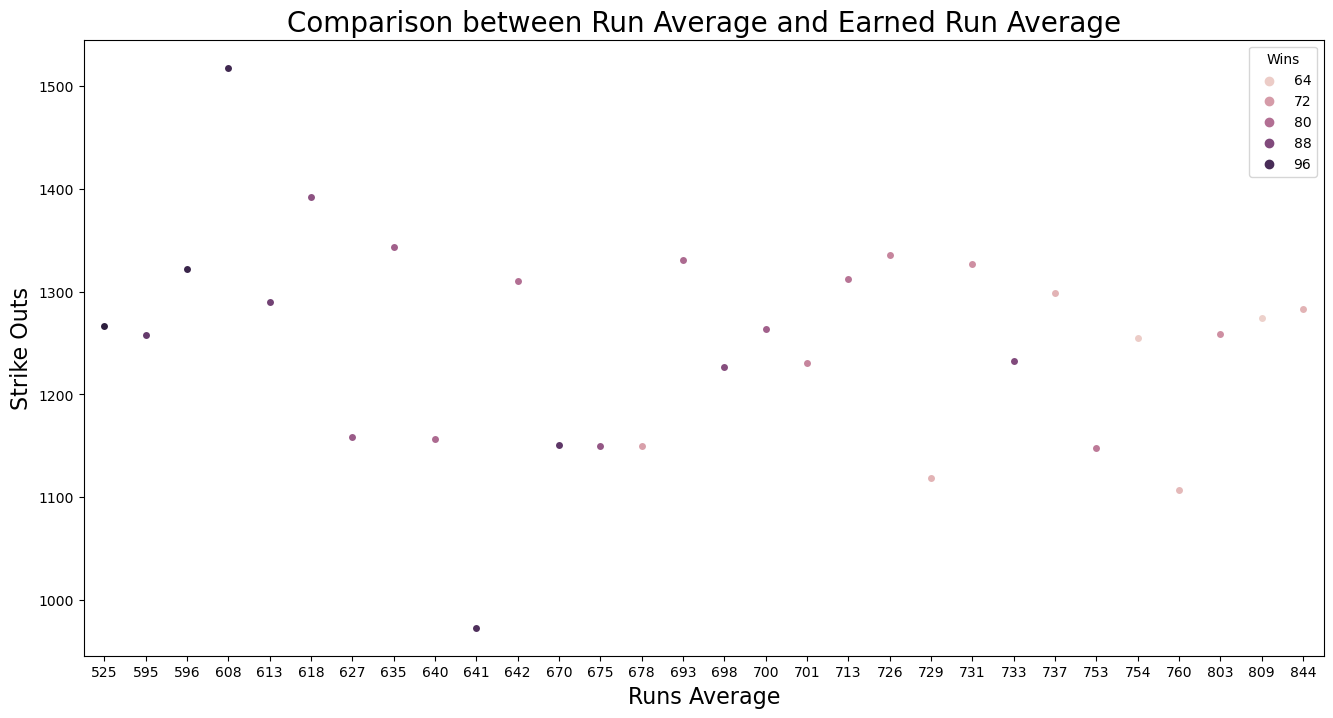

In [65]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.stripplot(x=df['Runs Average'],y=df['Strike Outs'],hue=df['Wins'])
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Strike Outs",fontsize =16)

- #### Comment :
    Strike outs are randomly placed giving not much any significant insights. Most probably strikeouts doesnot matter.

- <b> <u> There is one outlier in Runs score, lets check that entry </b><u/>

In [67]:
df['Runs Scored'].max()

891

In [68]:
df.loc[df['Runs Scored']==891]

Wins  Runs Scored  At Bat  Hits  Doubles  Triples  Home Runs  \
5    93          891    5509  1480      308       17        232   

   Base on Balls  Strike Outs  Stolen Base  Runs Average  Earned Runs  \
5            570         1151           88           670          609   

   Earned Run Average  Complete Game  Shut Outs  Saves  Errors  
5                 3.8              7         10     34      88

- It seem like highest Doubles, Homeruns and base ball also belong to this entry. Let cross check

In [69]:
df['Home Runs'].max(),df['Base on Balls'].max(),df['Doubles'].max()

(232, 570, 308)

- Here we got what we suspect.

In one of the previous result we suspect that Earned Run/Earned Run Average and Wins must have negative relationship, let check by looking at jointplot.

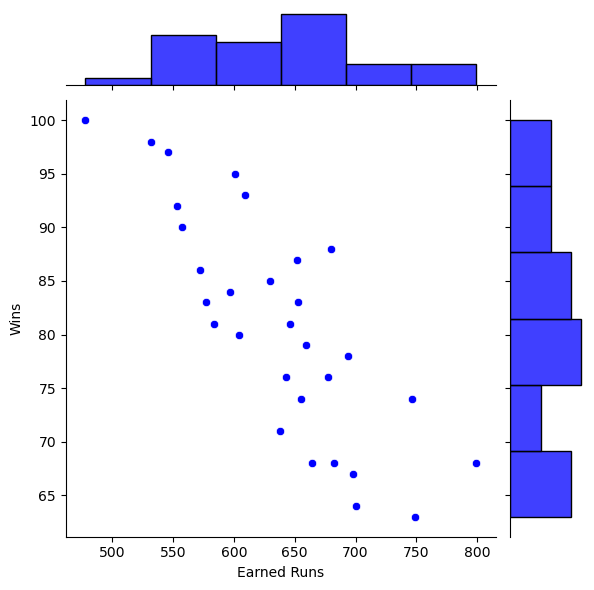

In [70]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="blue",palette="Set1")

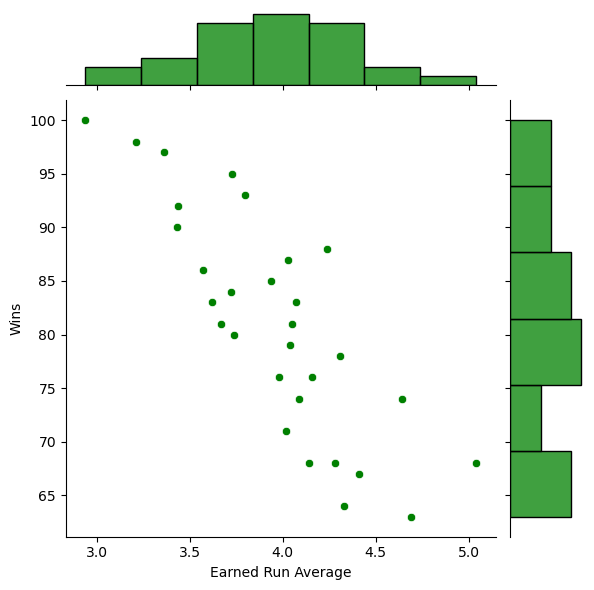

In [71]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="green",palette="Set1")

<b> Jointplot shows same story about Earned Run/Earned Run Average and Wins having linear negative relationship</b>

### Let check relationship between saves and wins

<Figure size 1000x1000 with 0 Axes>

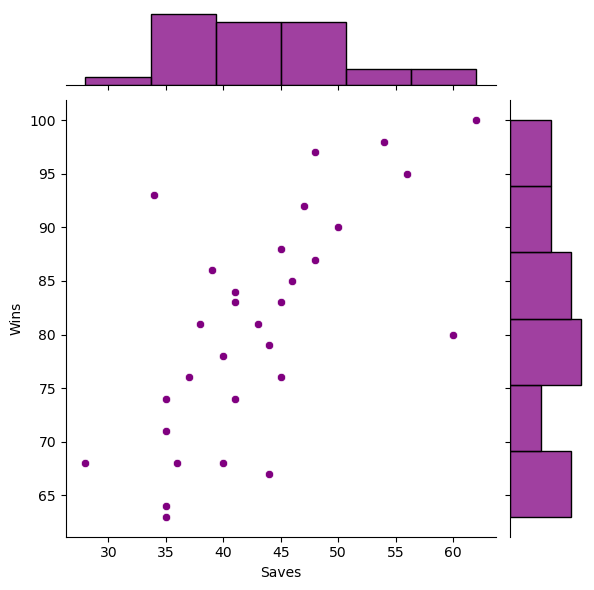

In [73]:
plt.figure(figsize=(10,10))
sns.jointplot(x="Saves", y="Wins", data=df, color="purple")

- #### Comment :
    - A save is rewarded to the relief pitcher who finishes a game for the winning team under certain circumstances 
    - Here with increase in the number of save increases the number of wins.

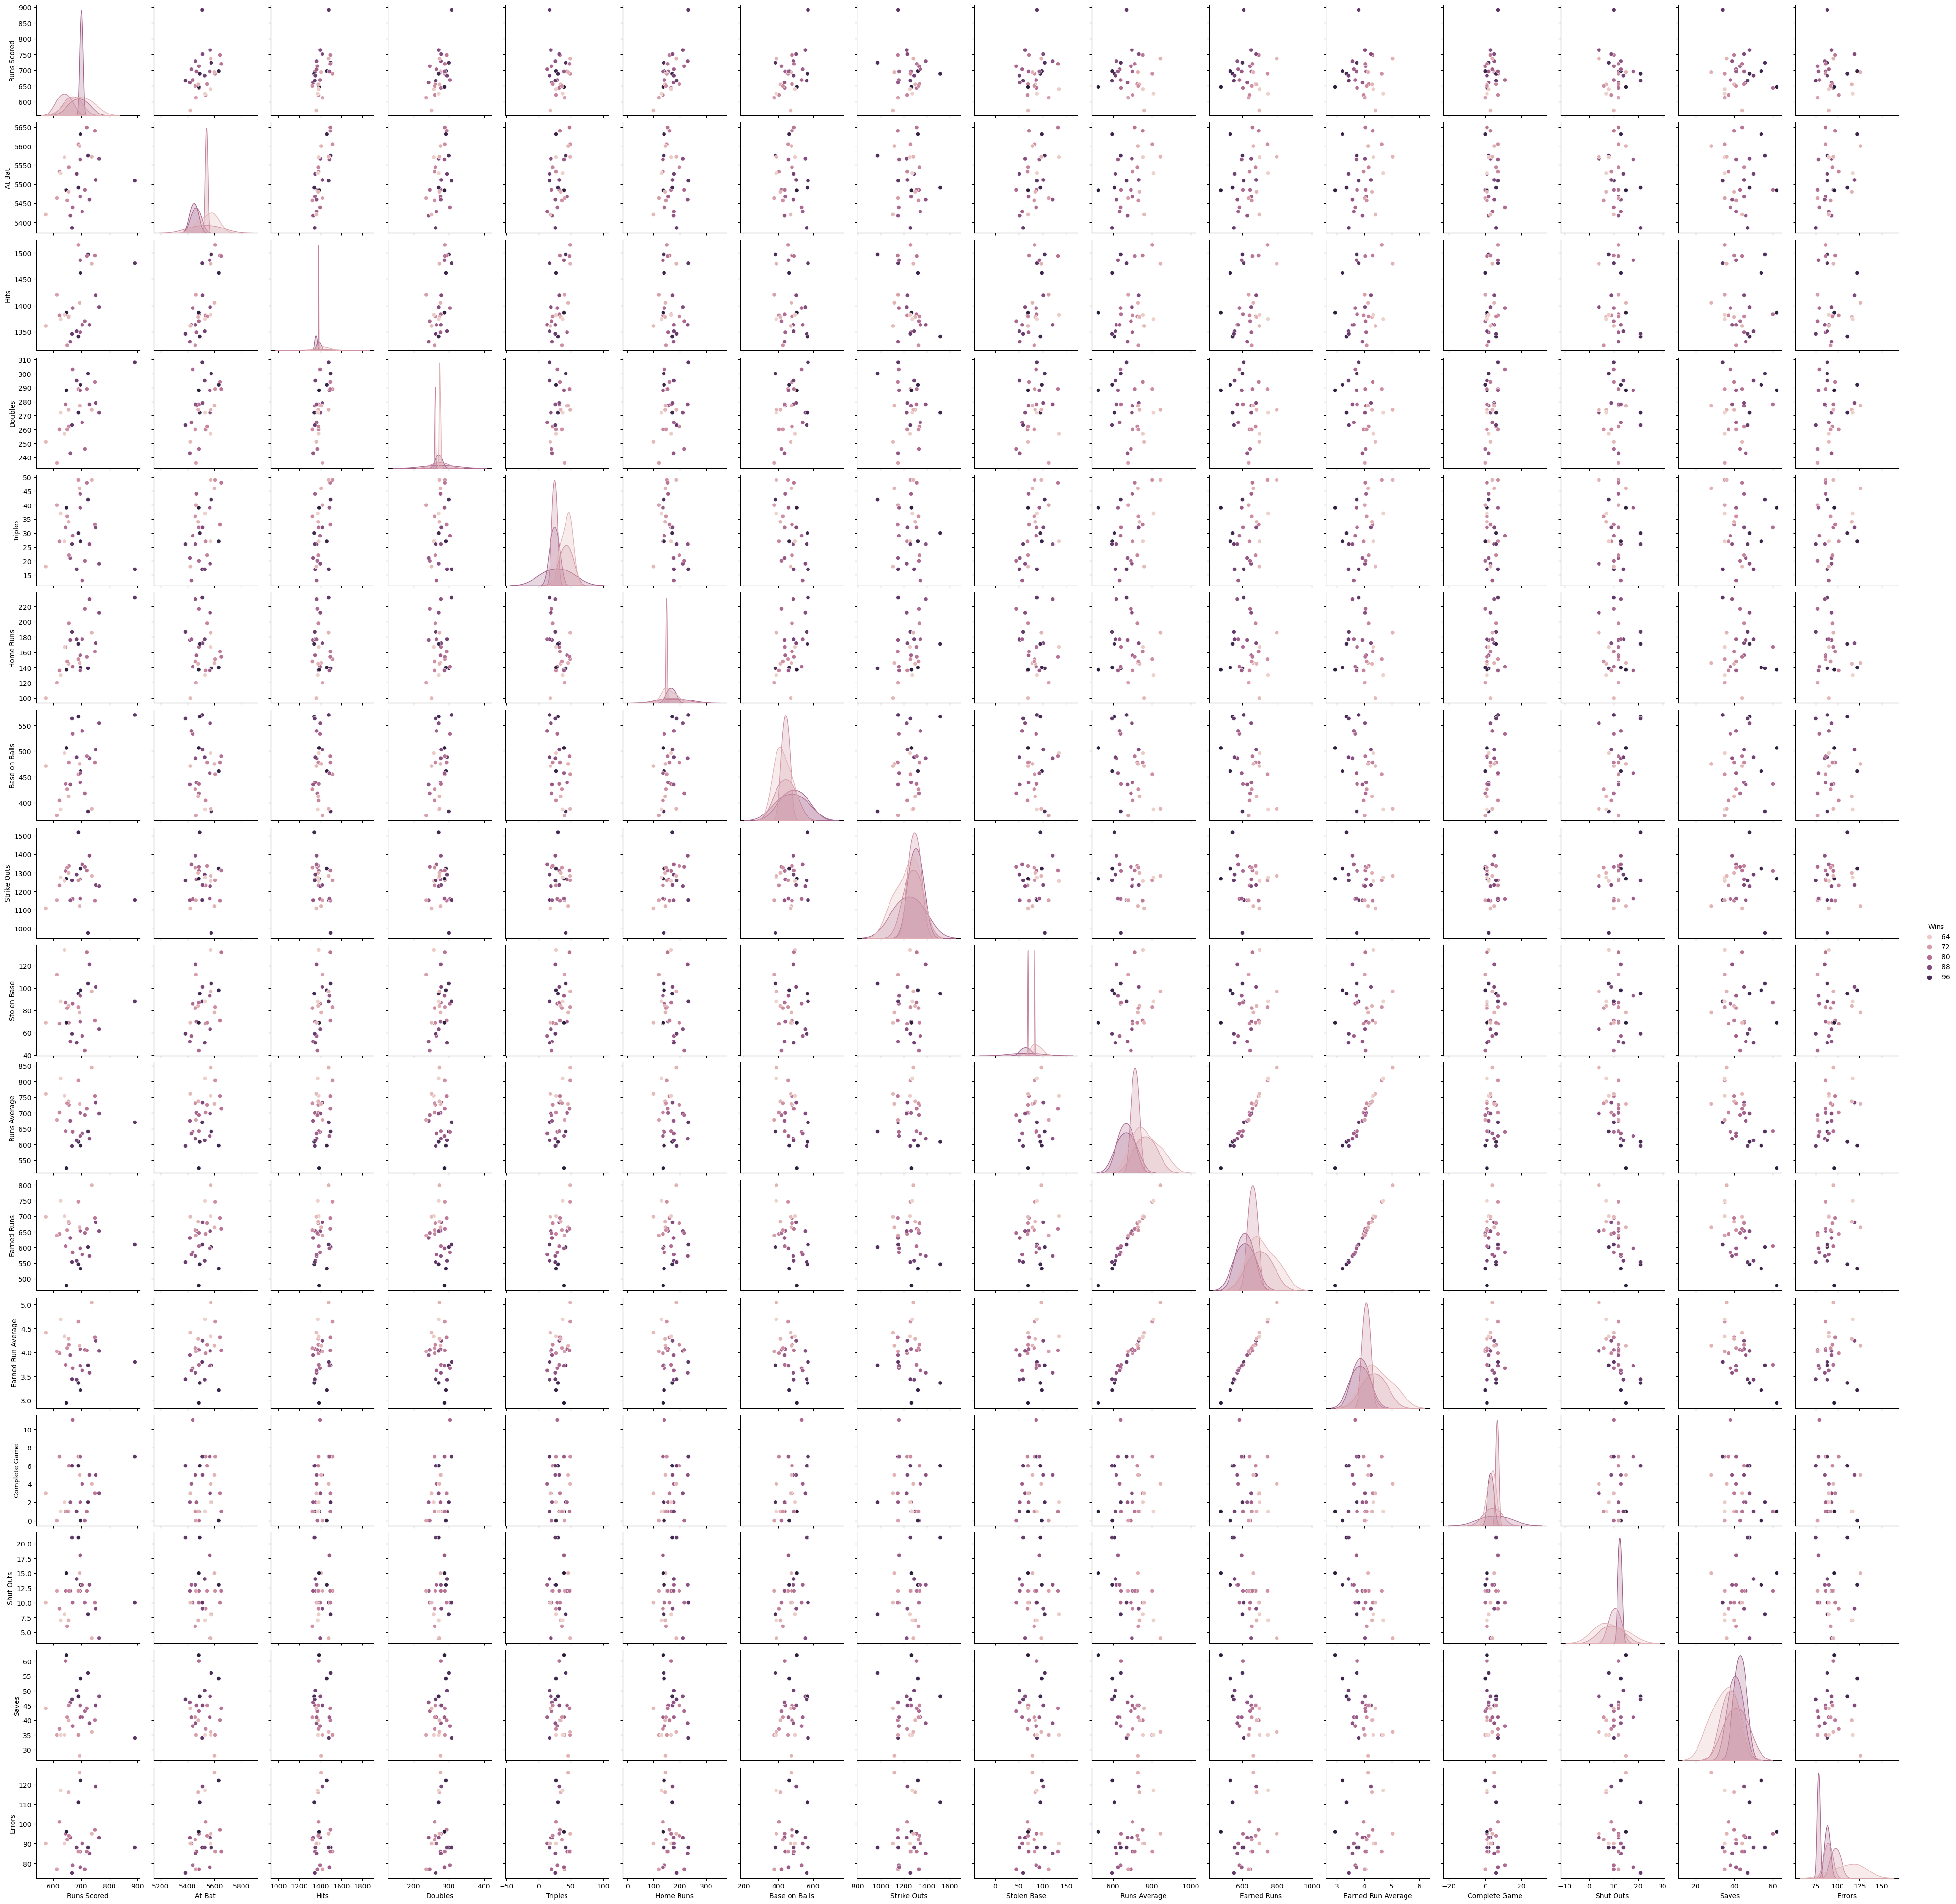

In [74]:
sns.pairplot(df, hue="Wins")

# Outliers Detection and Removal 

In [77]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [78]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df1.shape)

Shape of dataset after removing outliers : (29, 17)


# Data Loss

In [79]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((30-29)/30)*100,'%')

Percentage Data Loss : 3.3333333333333335 %


# Feature selection and Engineering

### 1. Skewness of features

In [80]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

#### Comment -
1. Optimal range for skewness is -0.5 to 0.5.
2. Hits, Complete Game, Shuts Outs, Saves, Errors are positively Skewed in nature, need to transform.

Transforming positive or right skew data using boxcox transformation

In [81]:
from scipy.stats import boxcox

In [82]:
df1['Hits']=boxcox(df1['Hits'],-2)

In [83]:
df1['Shut Outs']=boxcox(df1['Shut Outs'],0.5)

In [84]:
df1['Saves']=boxcox(df1['Saves'],0.5)

- <b>Other feature not able transform by Boxcox Method as they showing data must be positive. So others columns are transfrom using yeo-johnson method</b>

In [85]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [86]:
EC=['Errors','Complete Game']
ds =df1[EC].copy()

In [87]:
EC=['Errors','Complete Game']
ds =df1[EC].copy()

In [88]:
column_trans =ColumnTransformer(
    [  ('Errors',PowerTransformer(method='yeo-johnson',standardize=True),['Errors']),
      ('Complete Game',PowerTransformer(method='yeo-johnson',standardize=True),['Complete Game'])])
transformed_yeojohnson =column_trans.fit_transform(df1)   
new_cols=['Errors','Complete Game']
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset],axis=1)
dataset.head()

Errors  Complete Game
0 -0.348265      -0.307098
1 -0.540820      -0.307098
2 -1.326125       2.011315
3  0.650818       1.264463
4 -0.540820       1.264463

In [89]:
# reseting index and mergeing transform data
df1.reset_index(drop=True, inplace=True)
dataset.index=df1.index
df1[EC]=dataset[EC]

In [90]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.000000
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs            -0.085802
Saves                 0.370280
Errors                0.065585
dtype: float64

- <b> All features skewness is now transform within permissible limit of -0.5 to 0.5 as shown above </b>

In [91]:
df1.corr()

Wins  Runs Scored    At Bat      Hits   Doubles  \
Wins                1.000000     0.390451 -0.085780 -0.025885  0.384886   
Runs Scored         0.390451     1.000000  0.438022  0.429083  0.469293   
At Bat             -0.085780     0.438022  1.000000  0.771485  0.490752   
Hits               -0.025885     0.429083  0.771485  1.000000  0.525668   
Doubles             0.384886     0.469293  0.490752  0.525668  1.000000   
Triples            -0.206737     0.134204  0.445604  0.574467  0.342419   
Home Runs           0.245697     0.586894 -0.064653 -0.219890 -0.098695   
Base on Balls       0.447513     0.258450 -0.137850 -0.220426  0.211243   
Strike Outs         0.156469     0.081158 -0.111243 -0.375825 -0.096772   
Stolen Base        -0.169503     0.075323  0.373674  0.424369  0.194308   
Runs Average       -0.823176    -0.013858  0.315499  0.241583 -0.215196   
Earned Runs        -0.815308     0.007727  0.309146  0.278600 -0.224993   
Earned Run Average -0.826952    -0.009122  0.254872  0.254635 -0.248212   
Complete Game       0.007696     0.155122 -0.059648  0.070020  0.227220   
Shut Outs           0.477949    -0.119300 -0.193987 -0.134500  0.088345   
Saves               0.754886     0.071589 -0.127766 -0.093443  0.258675   
Errors             -0.079633     0.039865  0.332002 -0.012712  0.152541   

                     Triples  Home Runs  Base on Balls  Strike Outs  \
Wins               -0.206737   0.245697       0.447513     0.156469   
Runs Scored         0.134204   0.586894       0.258450     0.081158   
At Bat              0.445604  -0.064653      -0.137850    -0.111243   
Hits                0.574467  -0.219890      -0.220426    -0.375825   
Doubles             0.342419  -0.098695       0.211243    -0.096772   
Triples             1.000000  -0.369299      -0.404852    -0.196586   
Home Runs          -0.369299   1.000000       0.336814     0.479914   
Base on Balls      -0.404852   0.336814       1.000000     0.315566   
Strike Outs        -0.196586   0.479914       0.315566     1.000000   
Stolen Base         0.483818  -0.166072      -0.117622     0.038188   
Runs Average        0.312750  -0.092586      -0.425381    -0.140570   
Earned Runs         0.333731  -0.062094      -0.455832    -0.177655   
Earned Run Average  0.325883  -0.070756      -0.465794    -0.195362   
Complete Game      -0.004496   0.118284       0.445335    -0.063129   
Shut Outs          -0.067667  -0.030256       0.434799     0.200067   
Saves              -0.236230   0.084263       0.197177     0.105667   
Errors              0.080498  -0.165883      -0.056106     0.164817   

                    Stolen Base  Runs Average  Earned Runs  \
Wins                  -0.169503     -0.823176    -0.815308   
Runs Scored            0.075323     -0.013858     0.007727   
At Bat                 0.373674      0.315499     0.309146   
Hits                   0.424369      0.241583     0.278600   
Doubles                0.194308     -0.215196    -0.224993   
Triples                0.483818      0.312750     0.333731   
Home Runs             -0.166072     -0.092586    -0.062094   
Base on Balls         -0.117622     -0.425381    -0.455832   
Strike Outs            0.038188     -0.140570    -0.177655   
Stolen Base            1.000000      0.134315     0.146243   
Runs Average           0.134315      1.000000     0.991286   
Earned Runs            0.146243      0.991286     1.000000   
Earned Run Average     0.128848      0.986781     0.997261   
Complete Game         -0.040524      0.062434     0.067069   
Shut Outs             -0.098740     -0.641778    -0.639589   
Saves                 -0.187605     -0.637543    -0.616471   
Errors                 0.070527      0.231036     0.165556   

                    Earned Run Average  Complete Game  Shut Outs     Saves  \
Wins                         -0.826952       0.007696   0.477949  0.754886   
Runs Scored                  -0.009122       0.155122  -0.119300  0.071589   
At Bat                        0.254872     

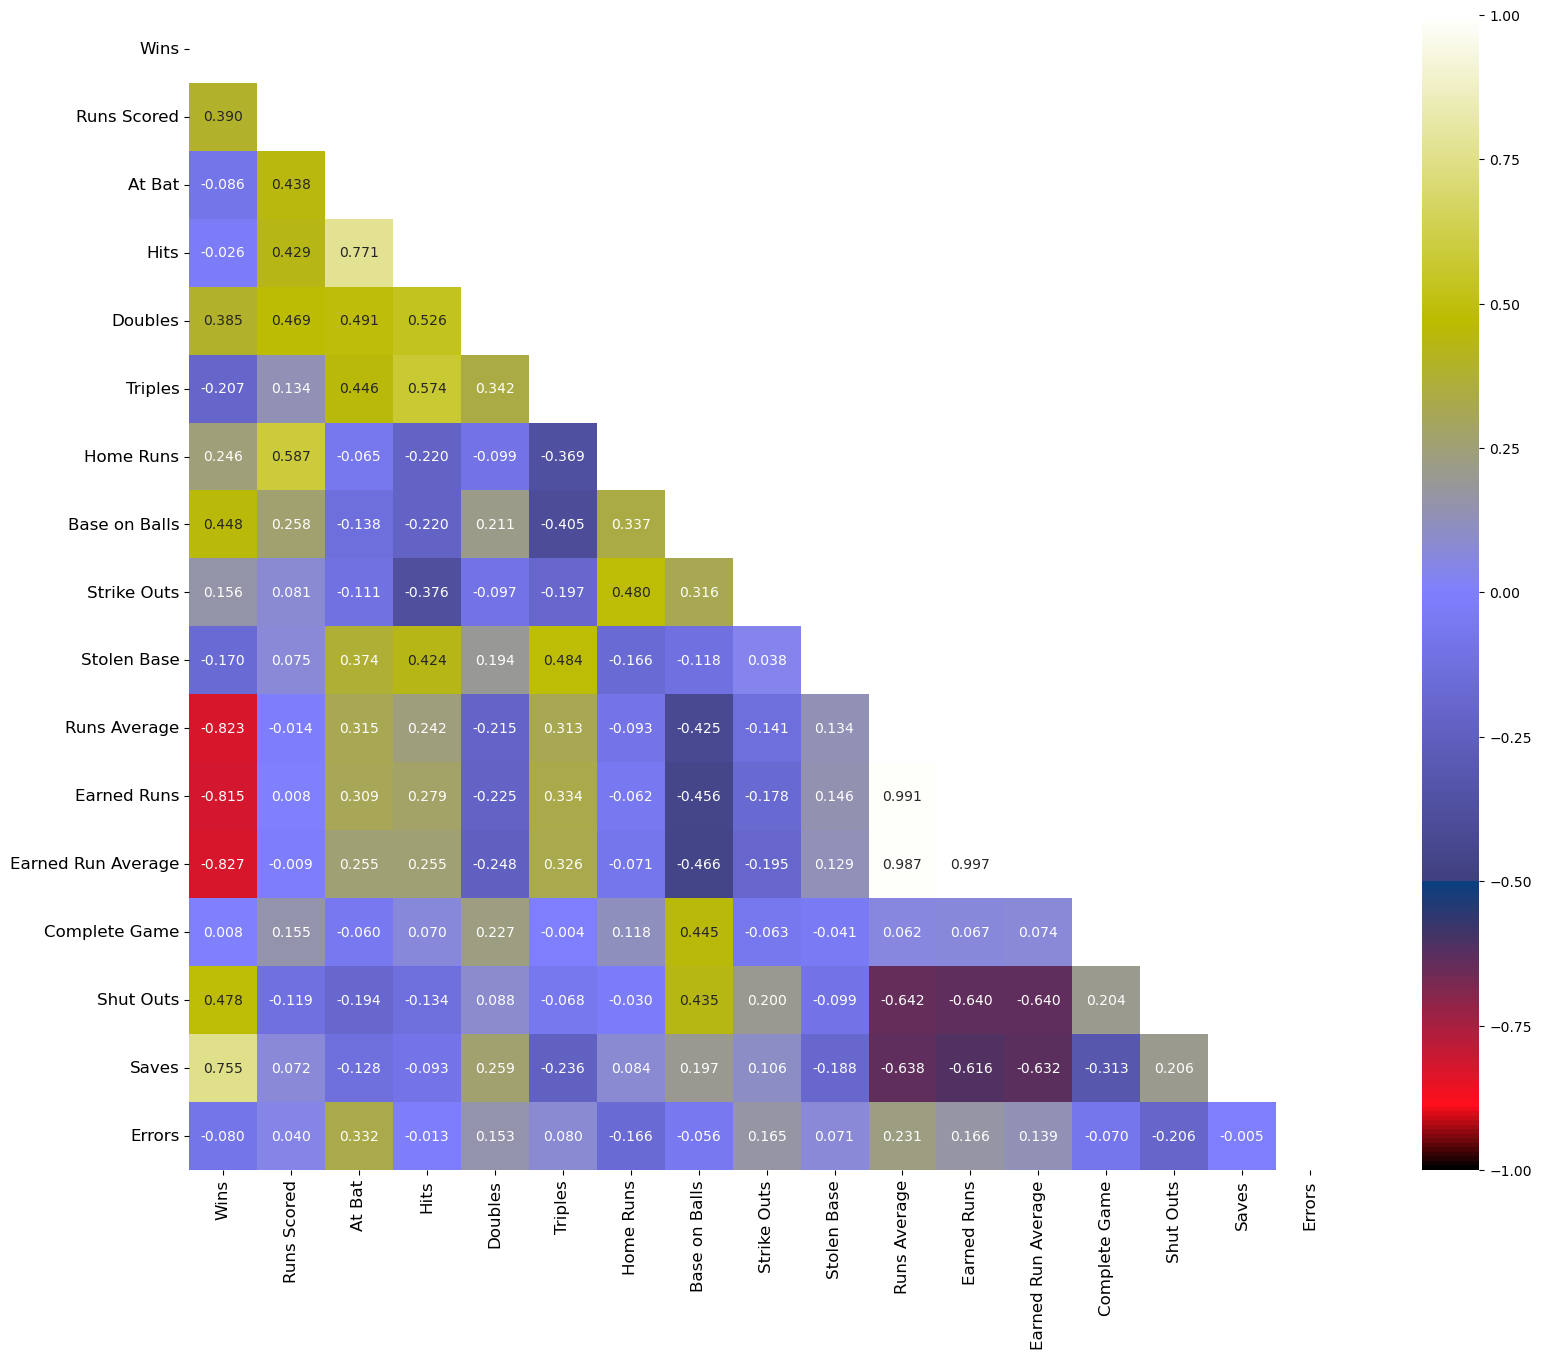

In [92]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

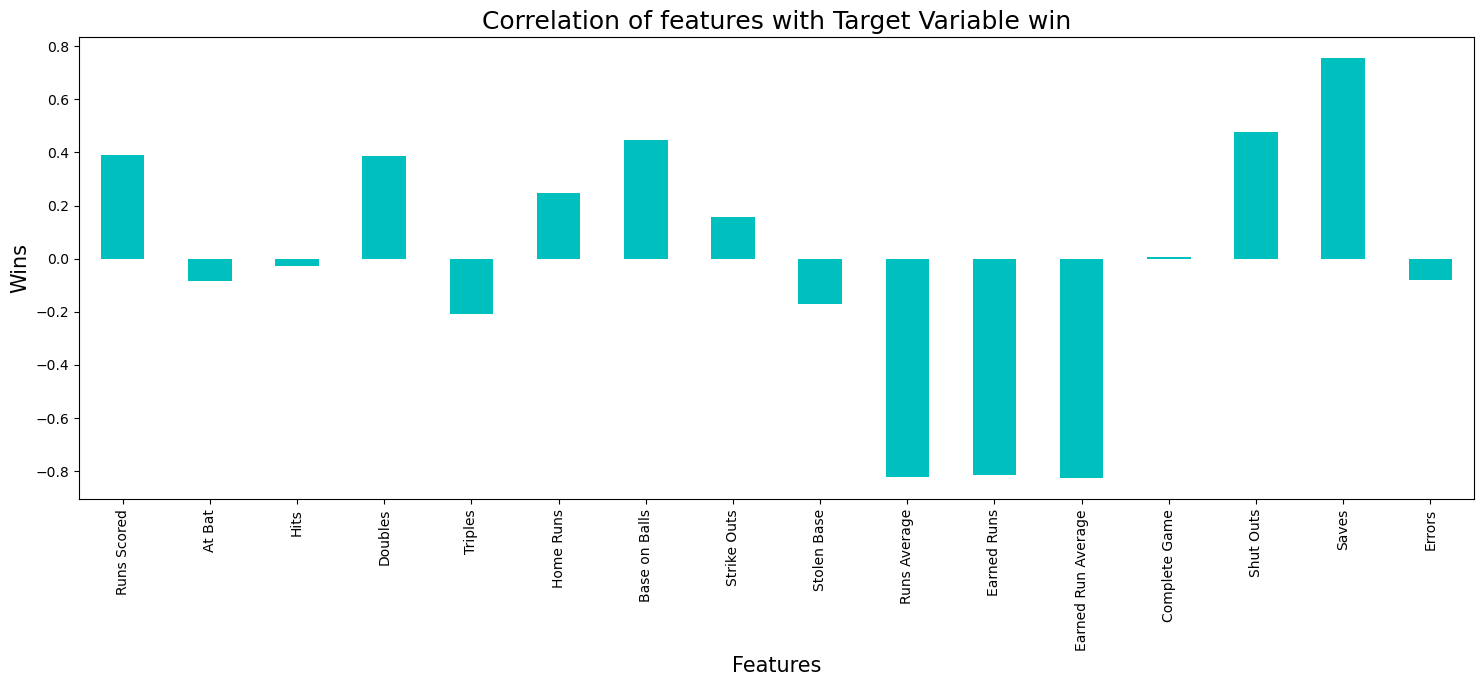

In [93]:
plt.figure(figsize = (18,6))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of features with Target Variable win',fontsize = 18)
plt.show()

- #### Comment :
    - Hits, At bats, Complete game and errors are very poorly correlated with target variable.
    - Saves, ERA,RA,EA are highly correleated with target variable.
    - here is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average". This need to check.

<b>This multicollinearity need to check it with varaiance inflation factor or need to address by use of PCA.</b>

# Standard Scaling

In [97]:
X=df1.drop(columns =['Wins'])
Y=df1['Wins']

In [98]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# PCA 

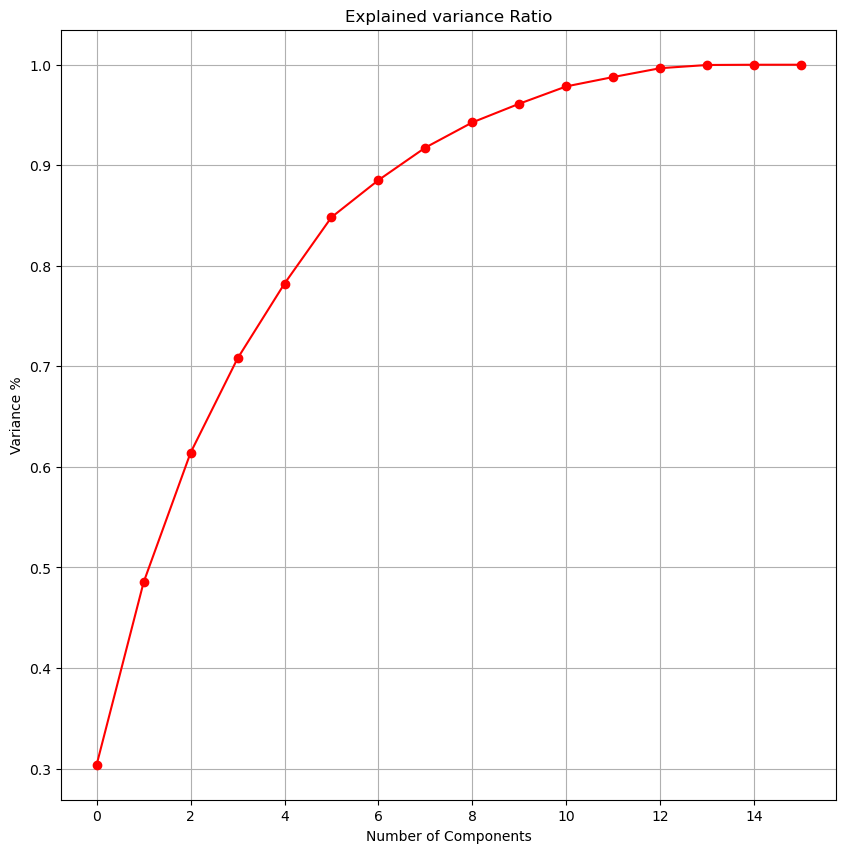

In [99]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Comment -
<b> AS per the graph, we can see that 7 principal components attribute for 95% of variation in the data.  We shall pick the first 7 components for our prediction </b>

#### Checking Multicollinearity after applying PCA

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

VIF  Features
0  1.0         0
1  1.0         1
2  1.0         2
3  1.0         3
4  1.0         4
5  1.0         5
6  1.0         6

We can see that Multicollinearity issue is clear now.

# ML Model Building

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso


In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (20, 7)
Training target vector size: (20,)
Test feature matrix size: (9, 7)
Test target vector size: (9,)


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9179738330851042 on Random_state 217


# Linear Regression : Base model¶

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [84.58605088 96.26198656 82.50274504 63.77883574 88.03714446 70.54986049
 82.43803368 72.96772225]


Actual Wins:
 2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: Wins, dtype: int64


# Linear Regression Evaluation Matrix

In [108]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2.5623356267648205
Mean squared error : 8.560199512884212
Root Mean Squared Error: 2.925781863516864


 R2 Score :
0.9179738330851042


# Cross validation

In [111]:
# Cross Validation
score = cross_val_score(lin_reg, principle_x, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.3354655028709037


### Finding best n_neighbors for KNN Regressor

In [115]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.246211251235321
RMSE value for k=  2 is: 6.267475568360838
RMSE value for k=  3 is: 6.1553951042064625
RMSE value for k=  4 is: 5.050525962709231
RMSE value for k=  5 is: 5.566866263886713
RMSE value for k=  6 is: 5.9956581512513445
RMSE value for k=  7 is: 5.569367750728727
RMSE value for k=  8 is: 5.896900668995536
RMSE value for k=  9 is: 6.370868305259728
RMSE value for k=  10 is: 6.42008566921034


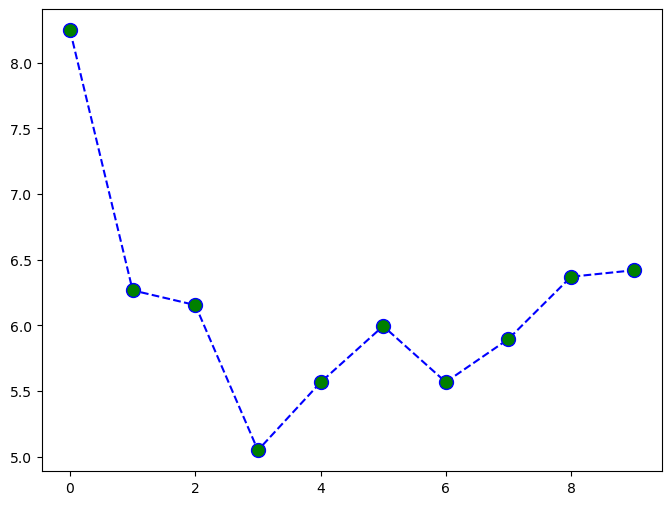

In [116]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Comment- 
At k= 4, we get the minimum RMSE value which approximately 5.050525962709231, and shoots up on further increasing the k value. We can safely say that k=4 will give us the best result in this case


# Applying other Regression Model, Evaluation & Crossvalidation

In [121]:
rf = RandomForestRegressor()
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
knn=KNeighborsRegressor()
ls=Lasso()
rd=Ridge()

model = [rf,ls,rd,svr,dtc,adb,gradb,knn]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 4.867499999999998
Mean squared error : 38.36359999999997
Root Mean Squared Error: 6.193835645220171


 R2 Score :
0.6323895193891305


Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.27795203185331147


 Error of  Lasso() :
Mean absolute error : 3.3106801008584945
Mean squared error : 13.207064355288662
Root Mean Squared Error: 3.63415249477628


 R2 Score :
0.8734463065221628


Cross Validation Score : Lasso() :

Mean CV Score : 0.6406802173033188


 Error of  Ridge() :
Mean absolute error : 2.5411586097679493
Mean squared error : 8.510305554715387
Root Mean Squared Error: 2.917242800096589


 R2 Score :
0.9184519306031165


Cross Validation Score : Ridge() :

Mean CV Score : 0.6758382874990942


 Error of  SVR() :
Mean absolute error : 7.423316490801712
Mean squared error : 90.46793457775965
Root Mean Squared Error: 9.511463324733985


 R2 Score :
0.13311157164596232


Cross Validation Score : SVR() :


#### we can see that Lasso Regression gives maximum R2 score of 91.84%. So we will apply Hyperparameter tuning on Lasso Regression



 True Values Vs Predicted Value plot RandomForestRegressor() :


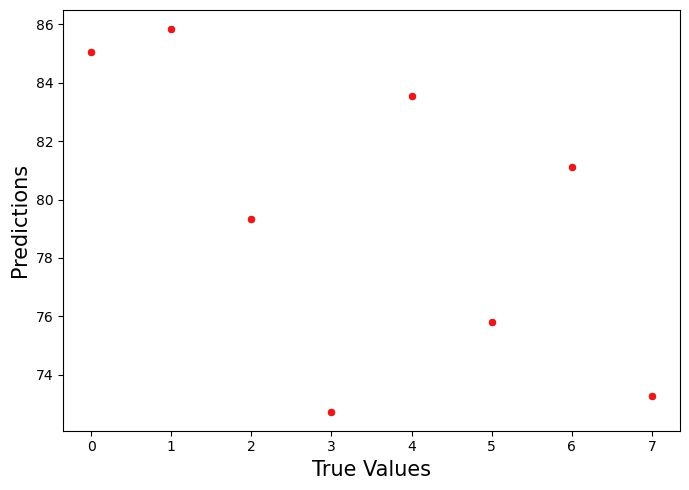





 True Values Vs Predicted Value plot Lasso() :


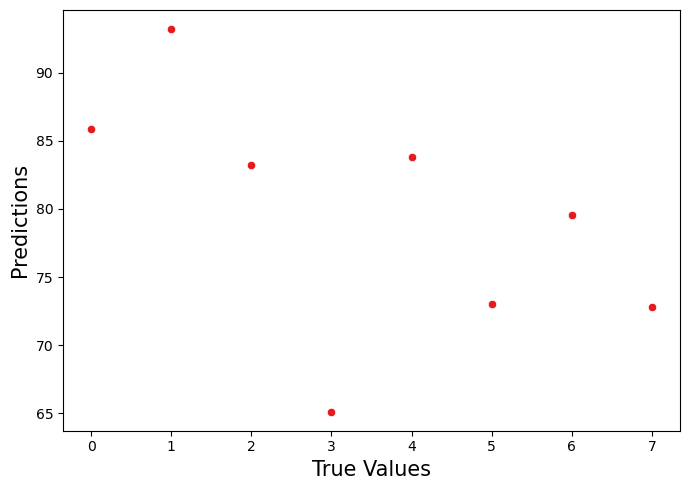





 True Values Vs Predicted Value plot Ridge() :


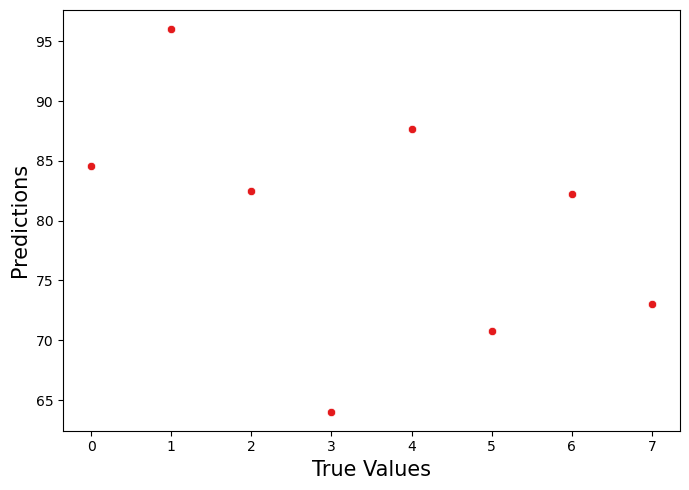





 True Values Vs Predicted Value plot SVR() :


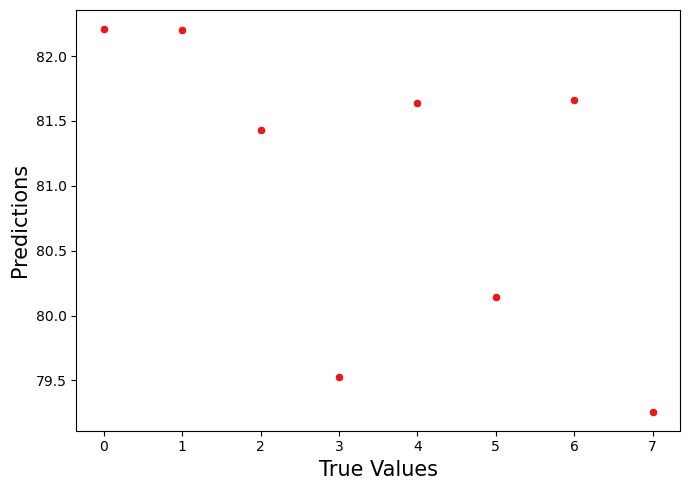





 True Values Vs Predicted Value plot DecisionTreeRegressor() :


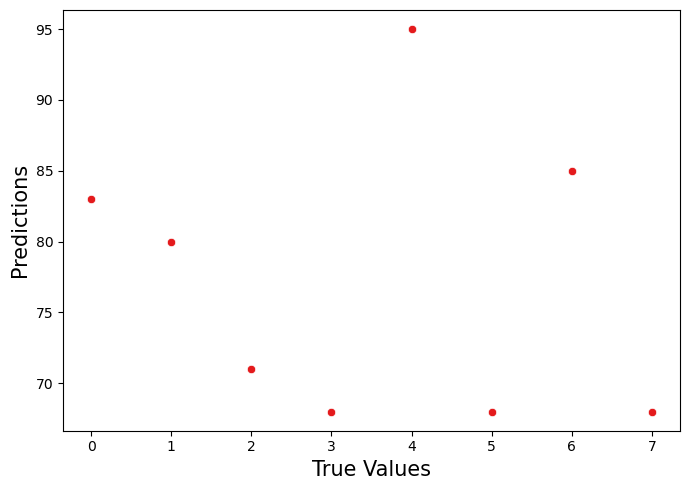





 True Values Vs Predicted Value plot AdaBoostRegressor() :


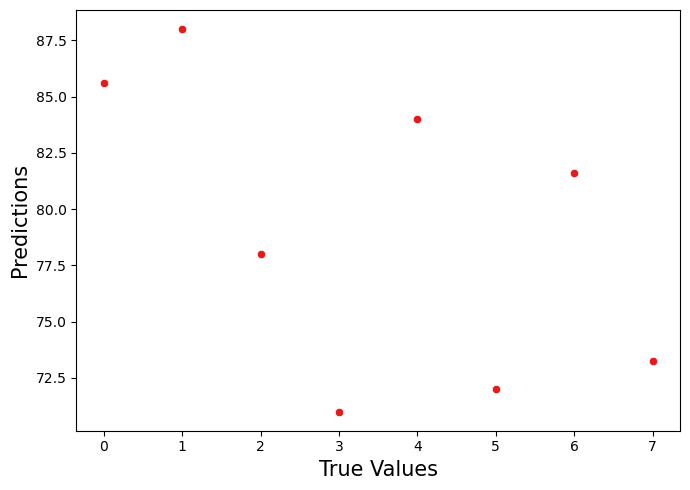





 True Values Vs Predicted Value plot GradientBoostingRegressor() :


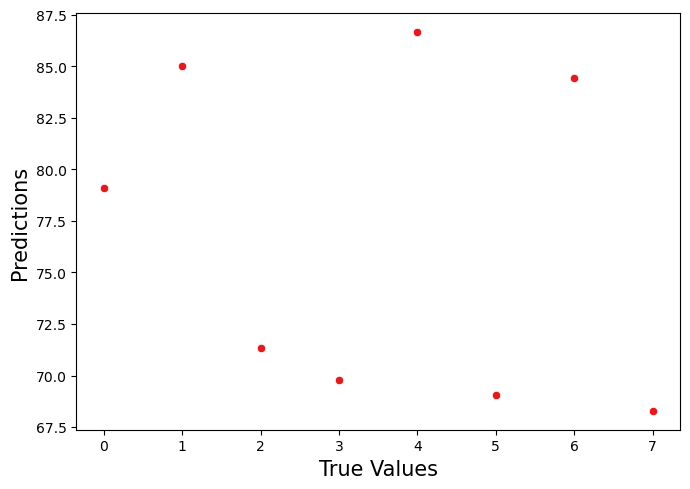





 True Values Vs Predicted Value plot KNeighborsRegressor() :


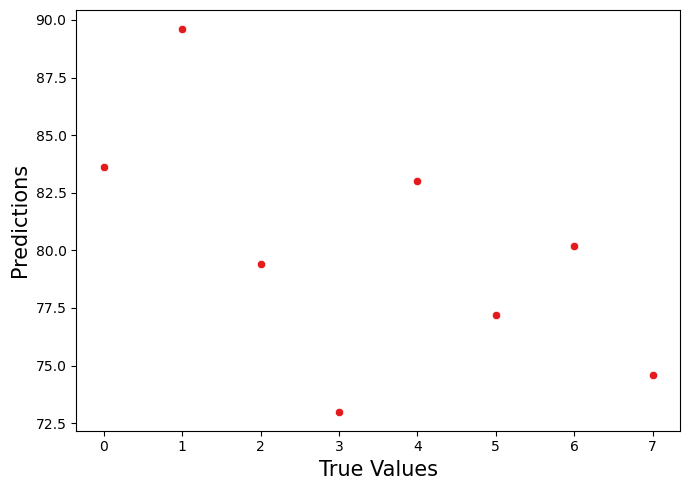

In [128]:
model = [rf,ls,rd,svr,dtc,adb,gradb,knn]

for m in model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

# Hyper Parameter Tuning : GridSearchCV

In [129]:
from sklearn.model_selection import GridSearchCV

In [134]:
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],'normalize':[True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}

In [135]:
GCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [136]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 19200 candidates, totalling 96000 fits


ValueError: Invalid parameter 'normalize' for estimator Lasso(max_iter=250). Valid parameters are: ['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'].

In [133]:
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Final MOdel

In [139]:
Final_mod = Lasso(alpha =0.5, fit_intercept=True, random_state = 32,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 2.6888055239454136
Mean squared error : 9.617386970550859
Root Mean Squared Error: 3.101191217992025


 R2 Score of Final Model :
0.9078435744699423




 True Values Vs Predicted Value plot :


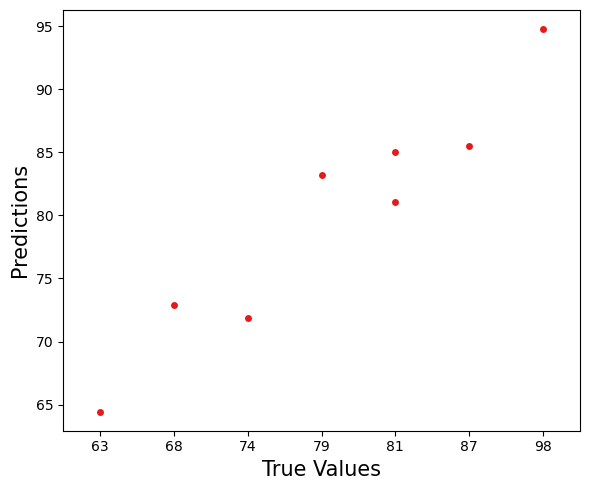

In [150]:
plt.figure(figsize=(6,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2),y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Saving Model

In [151]:
import joblib
joblib.dump(Final_mod,'Baseball_case_Final.pkl')

['Baseball_case_Final.pkl']